In [122]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [123]:
# dataset : https://archive.ics.uci.edu/dataset/222/bank+marketing

In [126]:
data = pd.read_csv('bank-full.csv', sep=';')
data.head() # first 5 rows of the dataset

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [127]:
data.shape

(45211, 17)

In [128]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [129]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [130]:
# checking the value counts for the categorical variables in the dataset
for feature in data.columns:
    if data[feature].nunique() < 14:
        print(data[feature].value_counts())
        print('-' * 60)

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
------------------------------------------------------------
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
------------------------------------------------------------
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
------------------------------------------------------------
default
no     44396
yes      815
Name: count, dtype: int64
------------------------------------------------------------
housing
yes    25130
no     20081
Name: count, dtype: int64
------------------------------------------------------------
loan
no     37967
yes     7244
Name: count, dtype: int64
------------------------

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [132]:
data.describe().T

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

### Exploratory Data Analysis

In [133]:
# importing the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

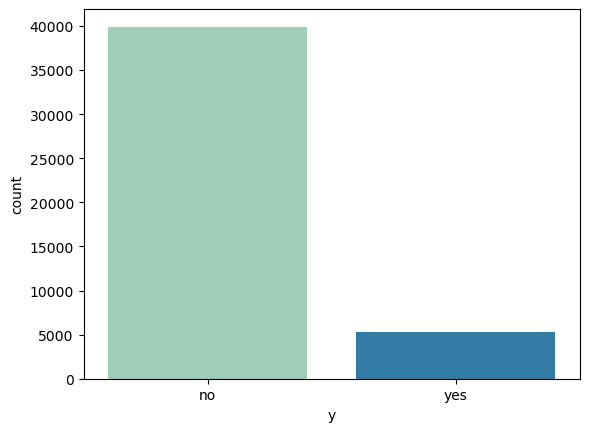

In [134]:
sns.countplot(x='y',data=data, palette='YlGnBu')
plt.savefig('dependent_varaible.png',bbox_inches='tight')
plt.show();

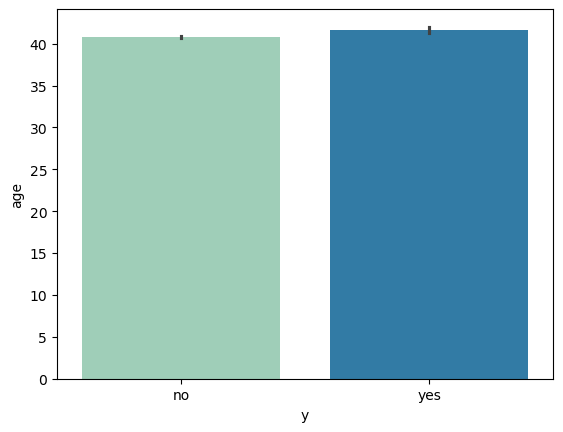

In [135]:
sns.barplot(x='y',y='age',data=data, palette='YlGnBu')
plt.savefig('y vs age.png',bbox_inches='tight')
plt.show();

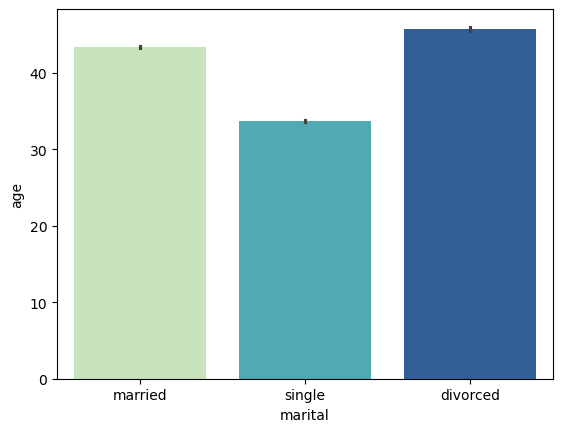

In [136]:
sns.barplot(y='age', x='marital',data= data, palette='YlGnBu')
plt.savefig('marital vs age.png',bbox_inches='tight')
plt.show();

In [15]:
categorical_feature = [feature for feature in data.columns if data[feature].dtype == 'O' and feature != 'y']
numerical_feature = [feature for feature in data.columns if data[feature].dtype in ['int64','float64']]

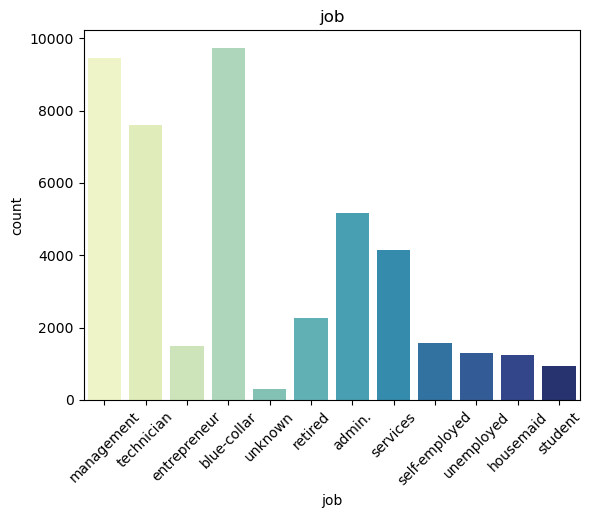

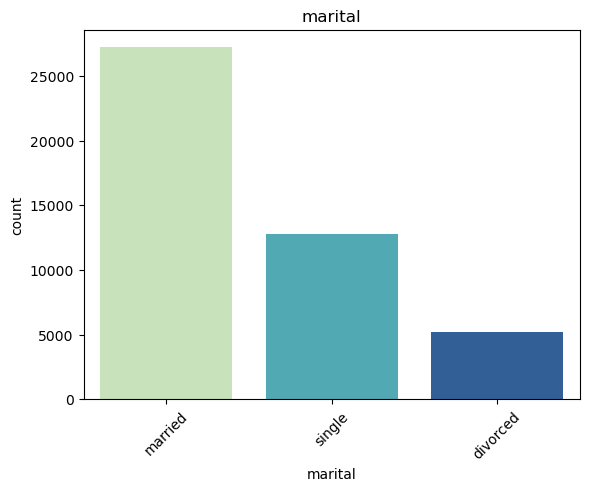

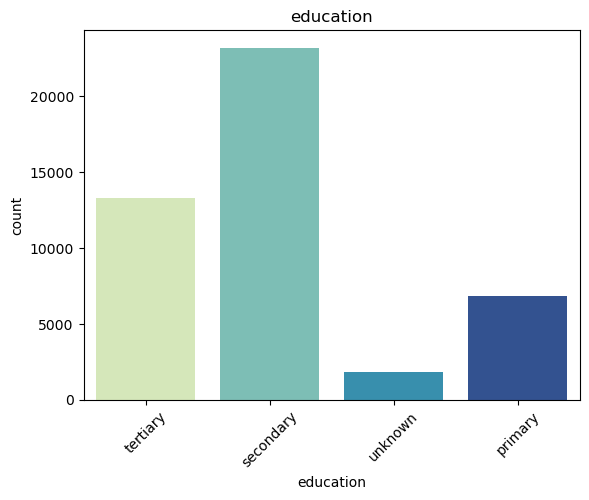

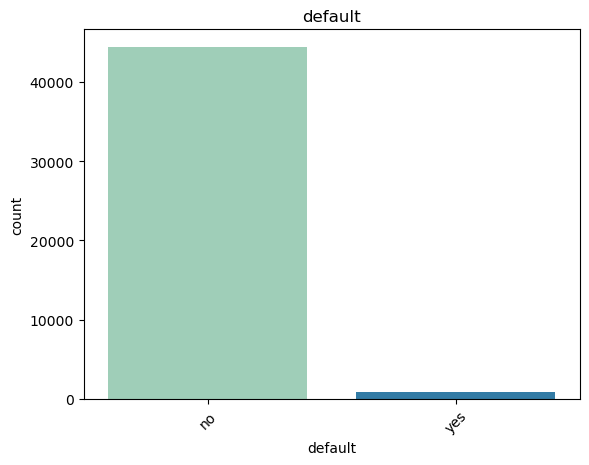

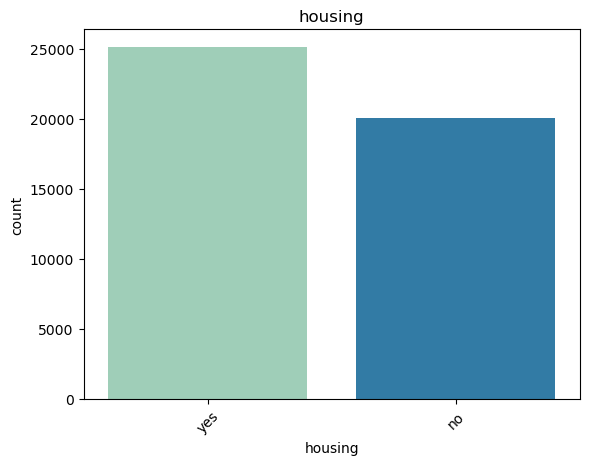

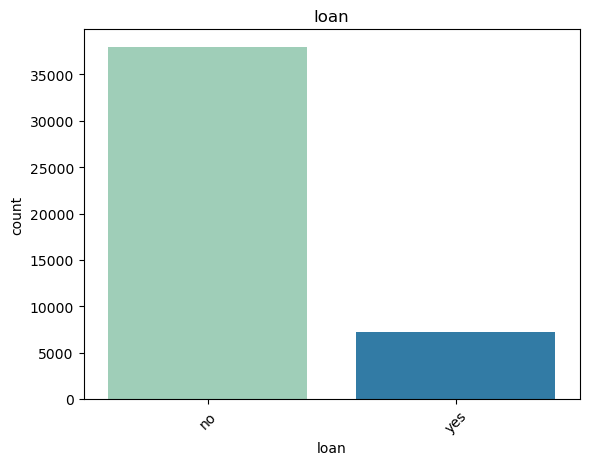

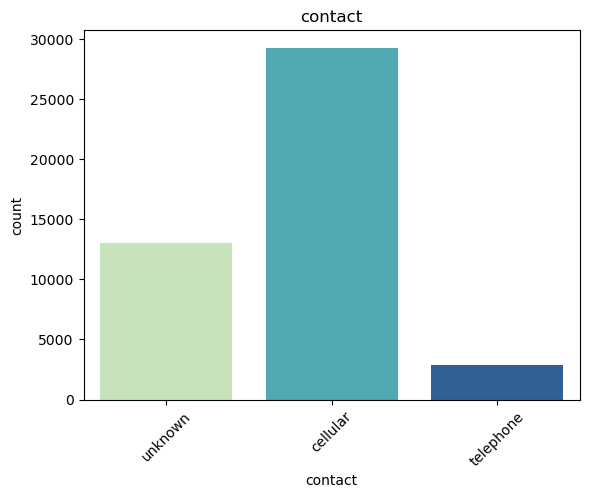

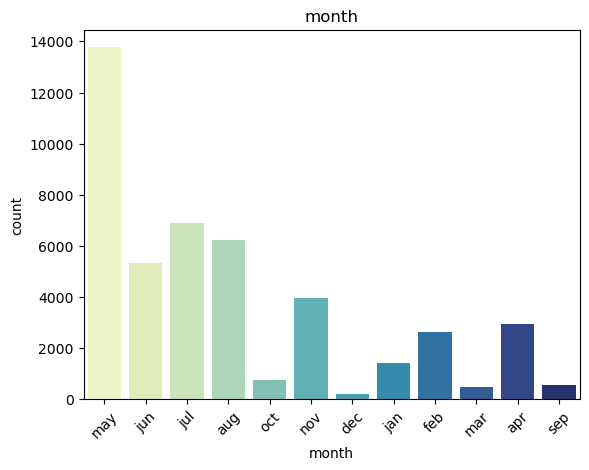

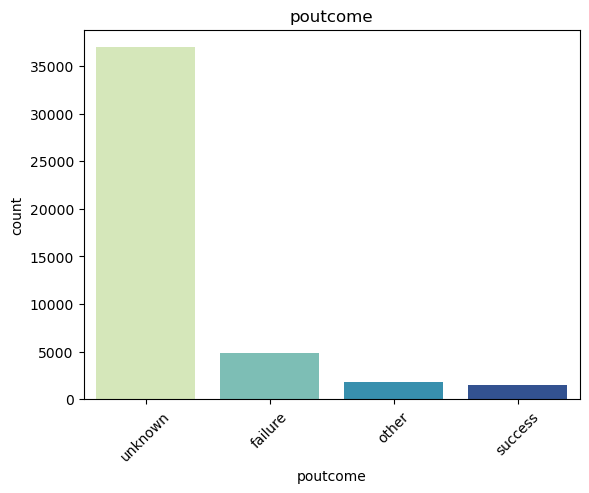

In [141]:
for feature in categorical_feature:
    sns.countplot(x=feature,data=data, palette='YlGnBu')
    plt.title(feature)
    plt.xticks(rotation=45)
    plt.show();

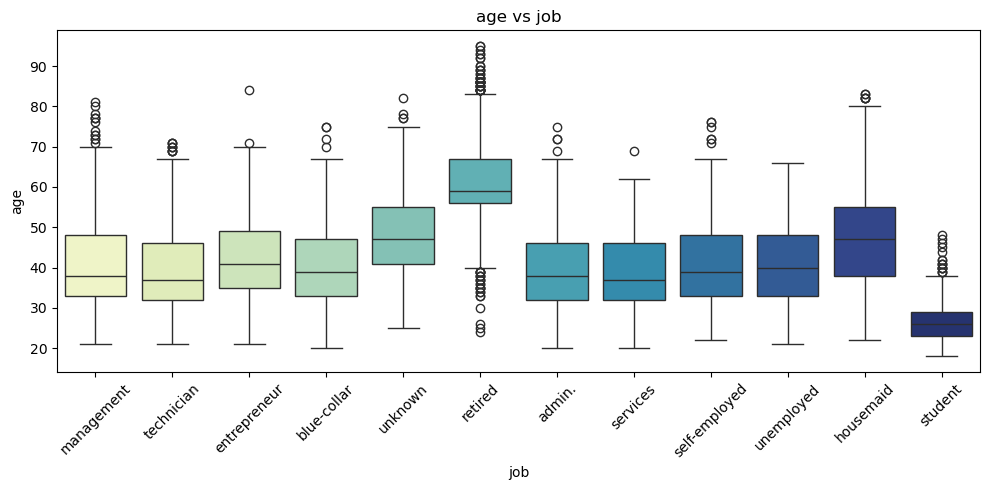

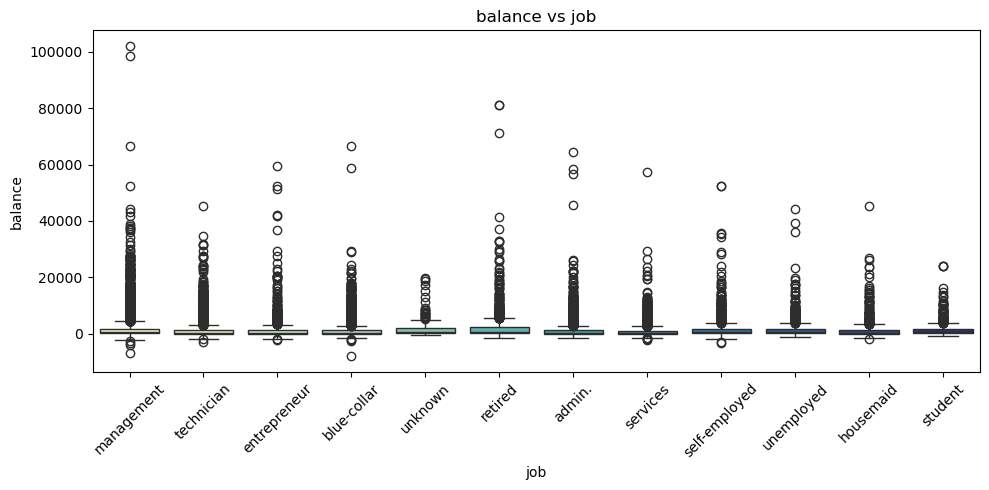

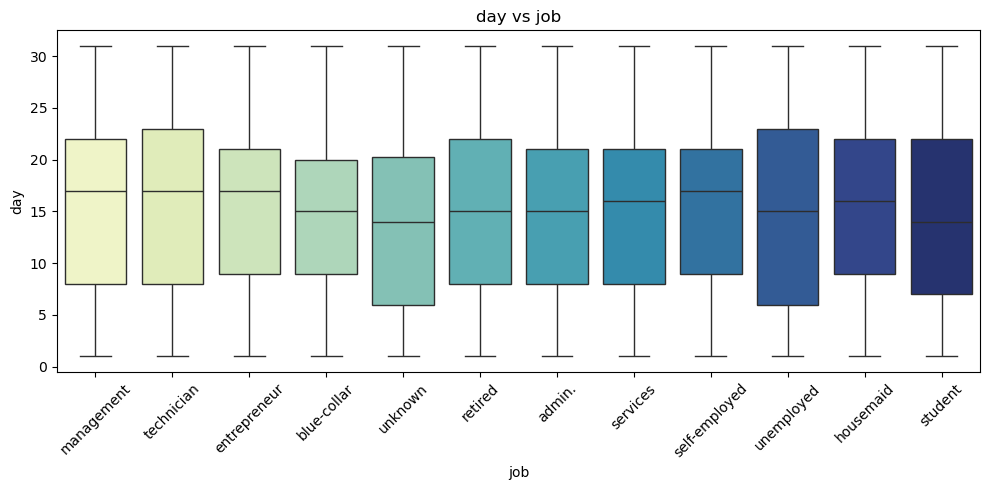

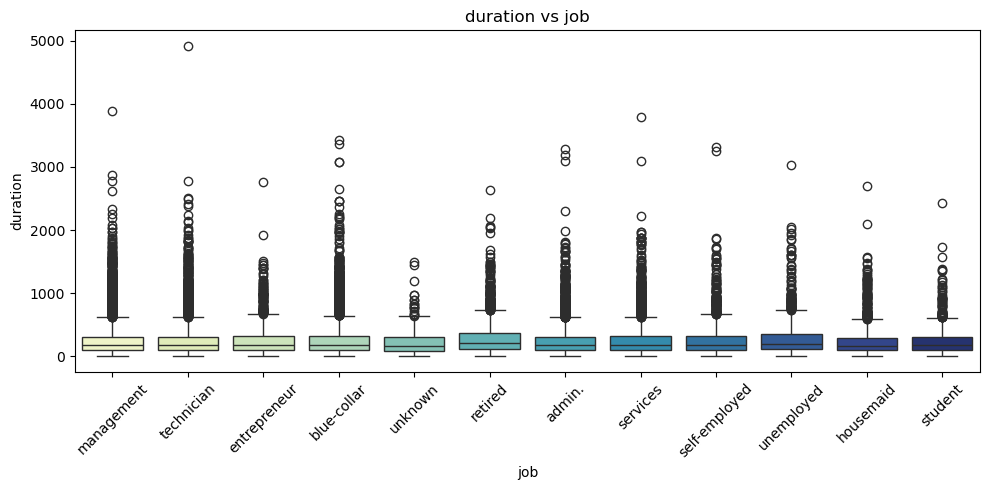

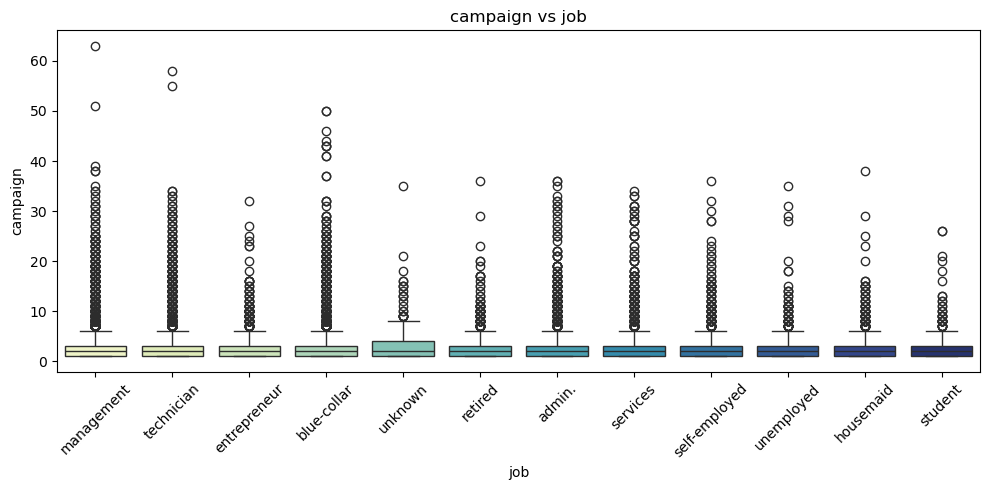

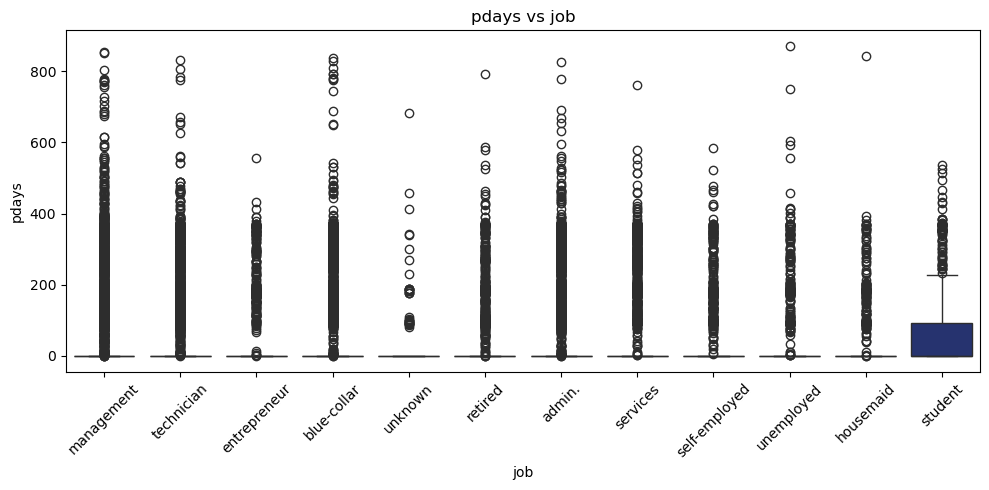

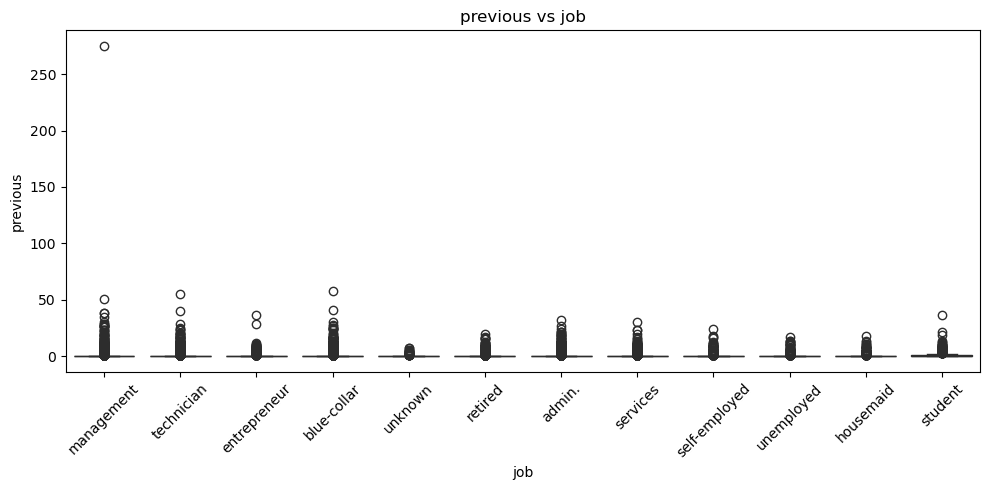

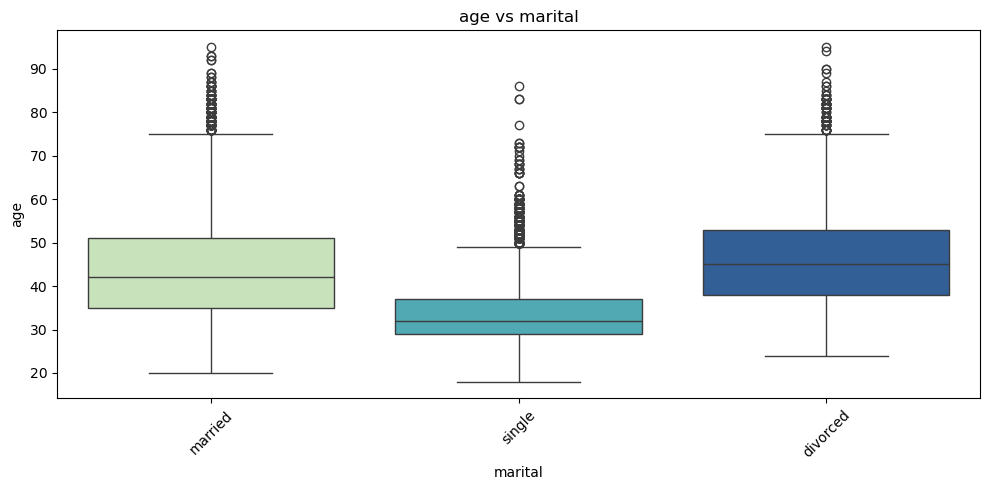

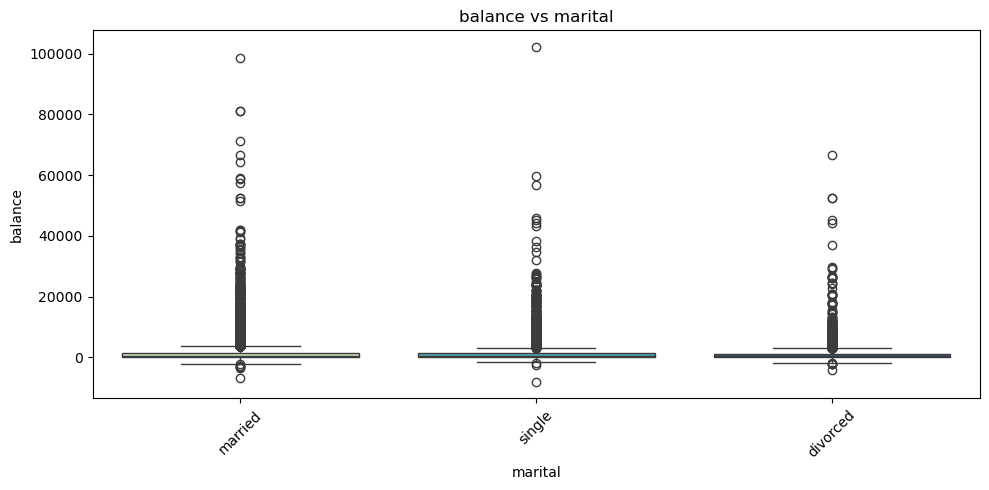

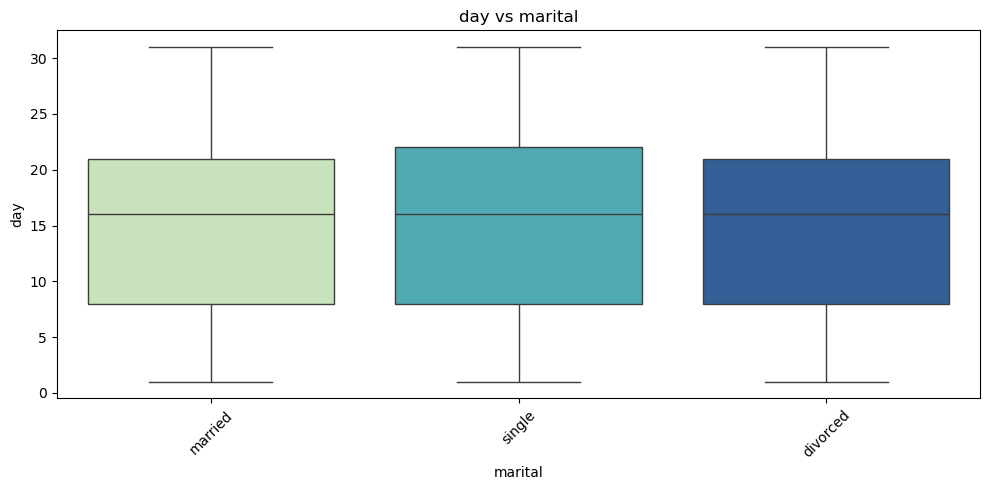

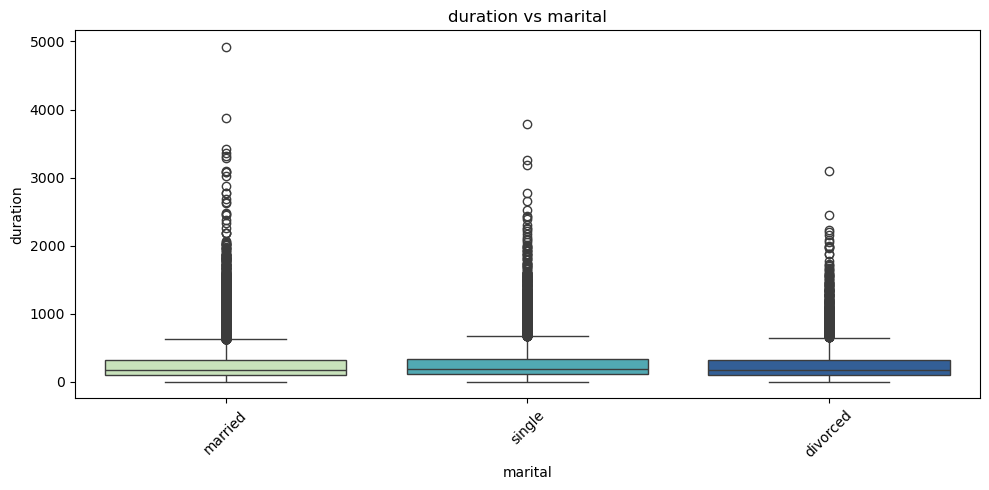

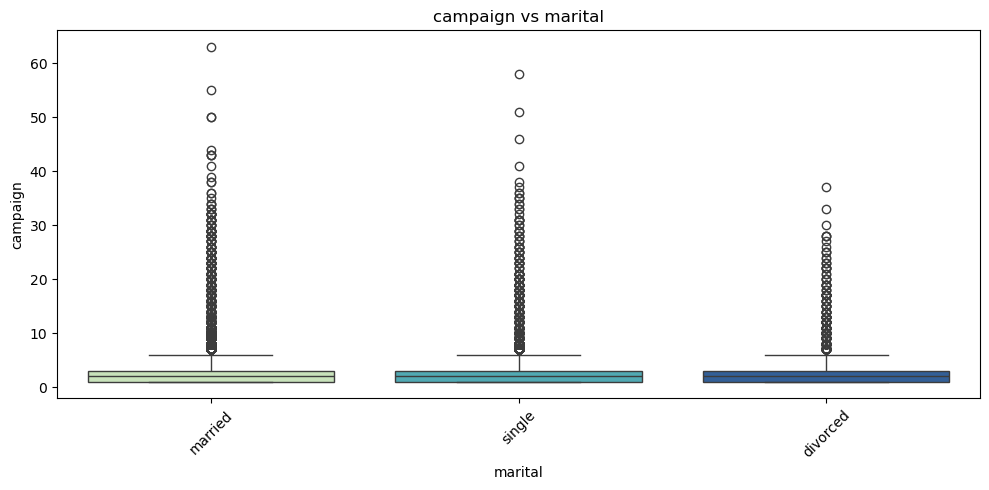

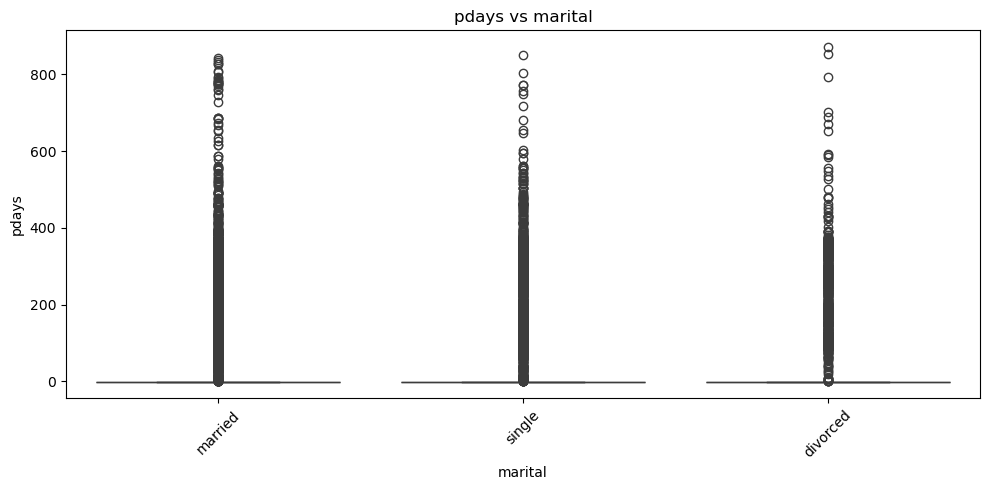

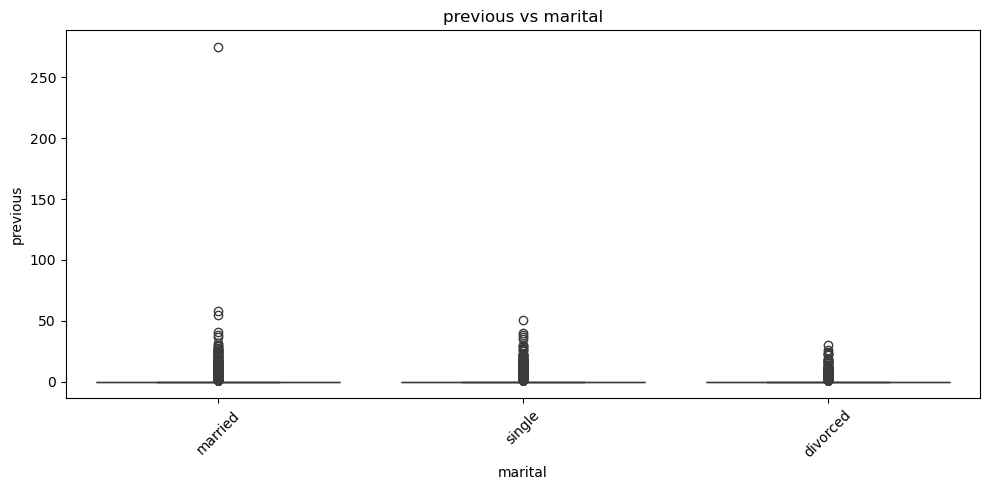

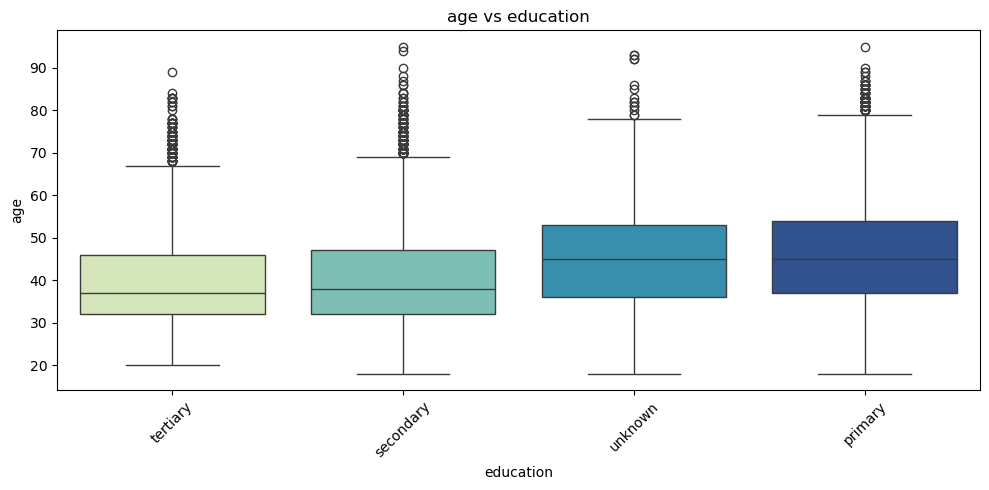

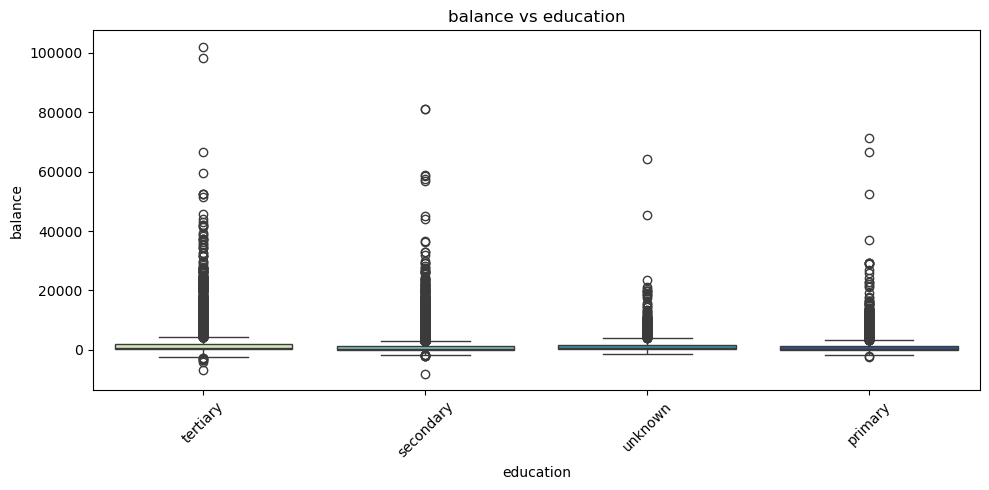

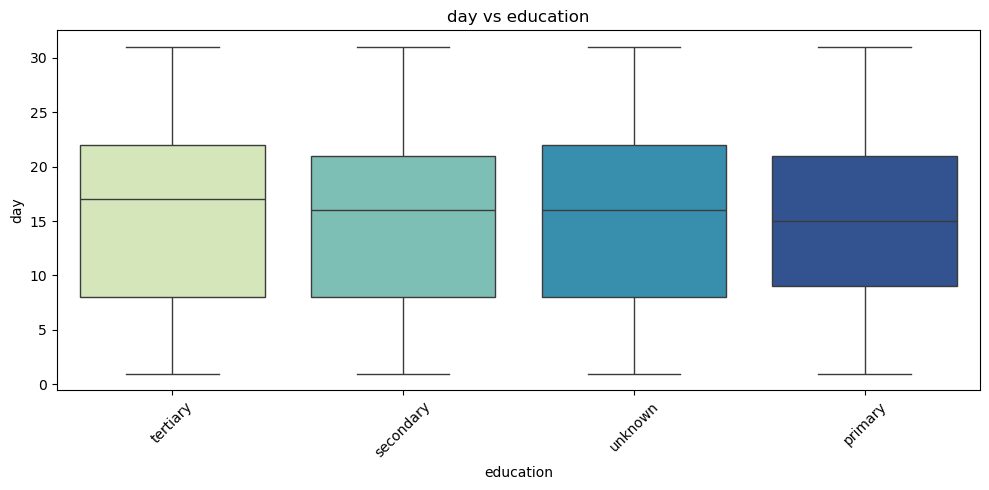

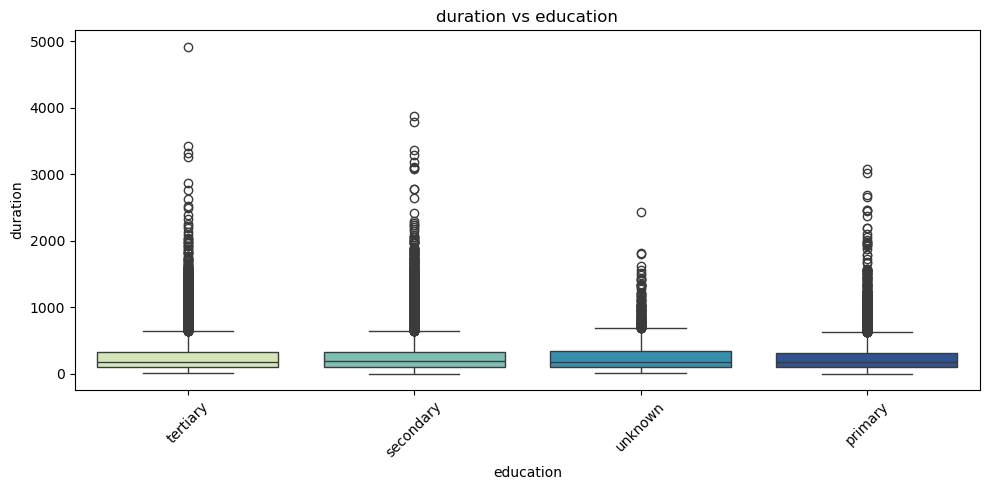

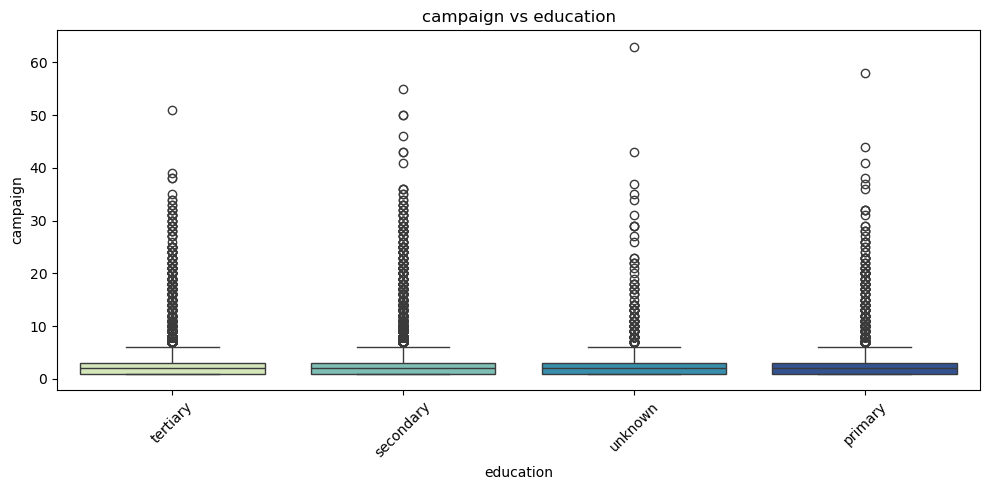

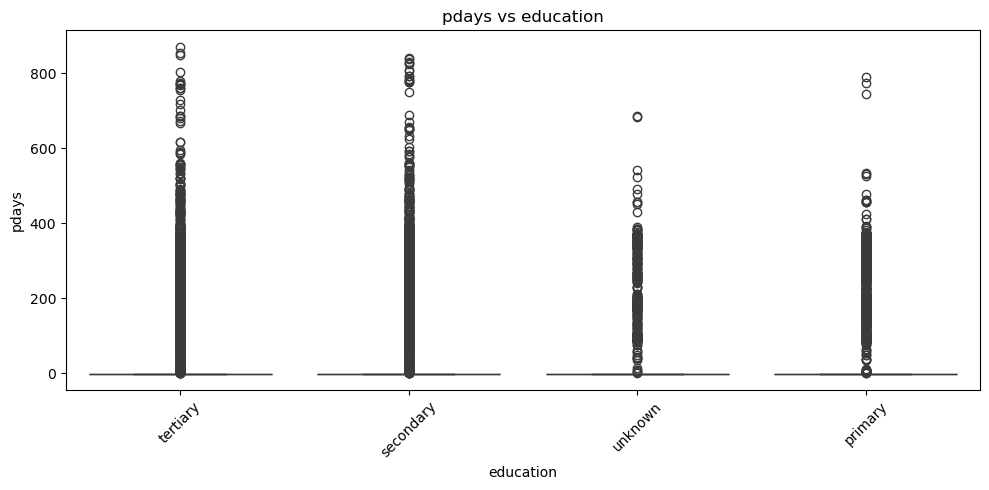

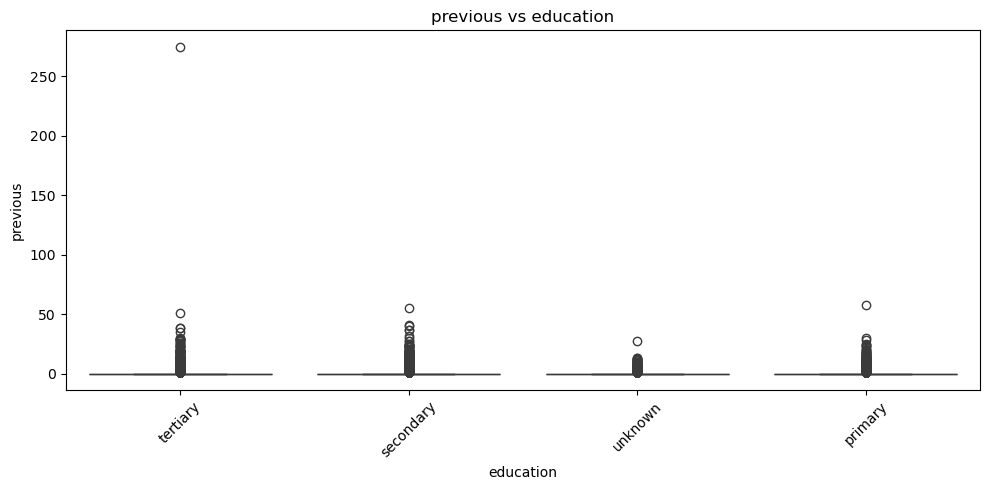

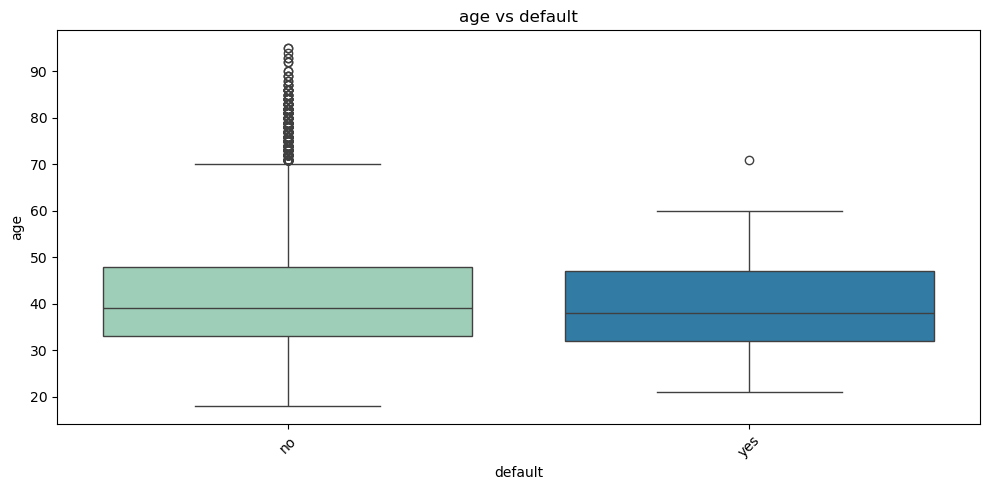

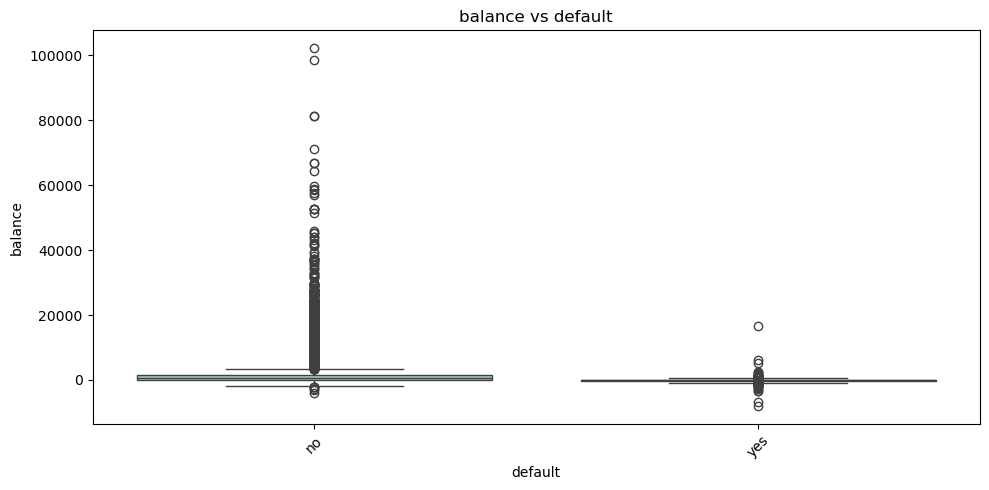

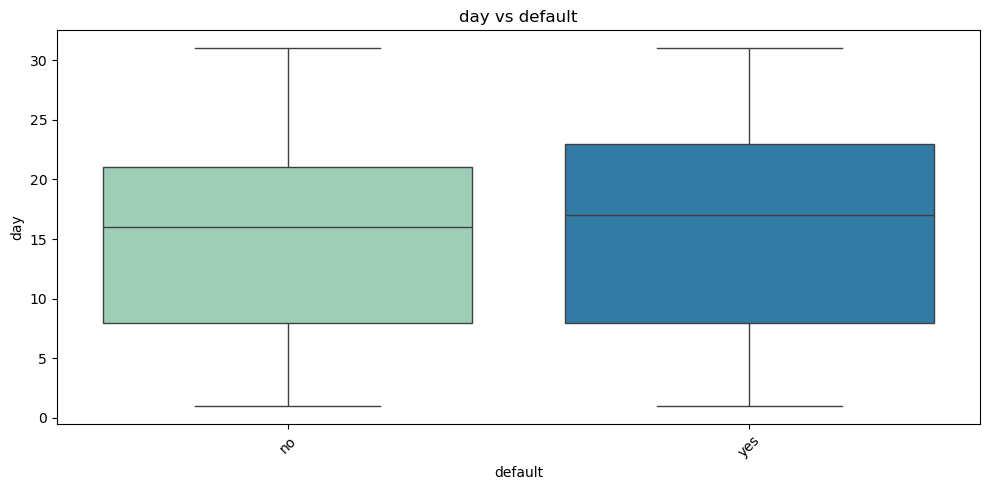

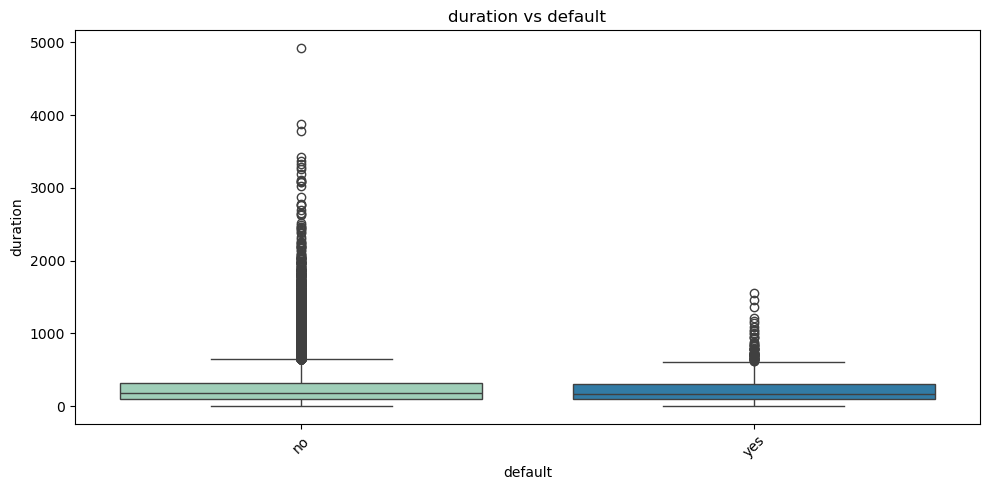

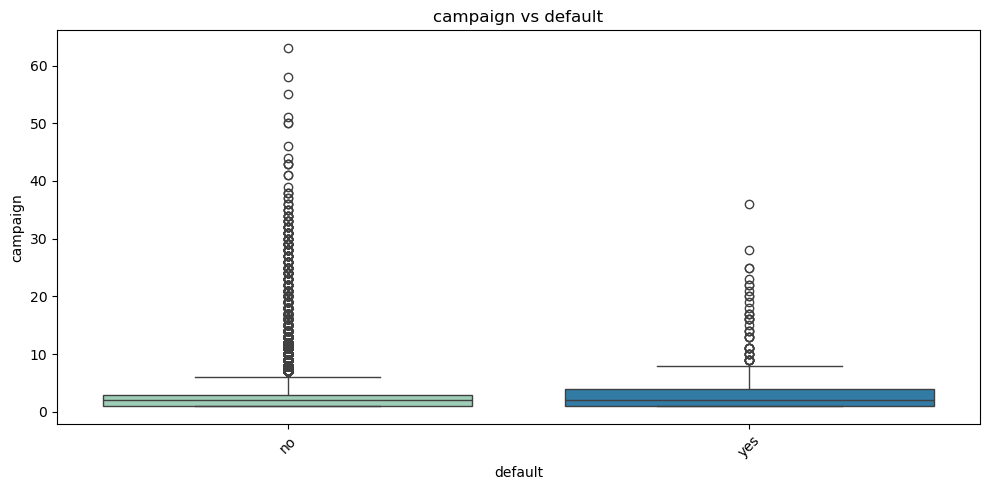

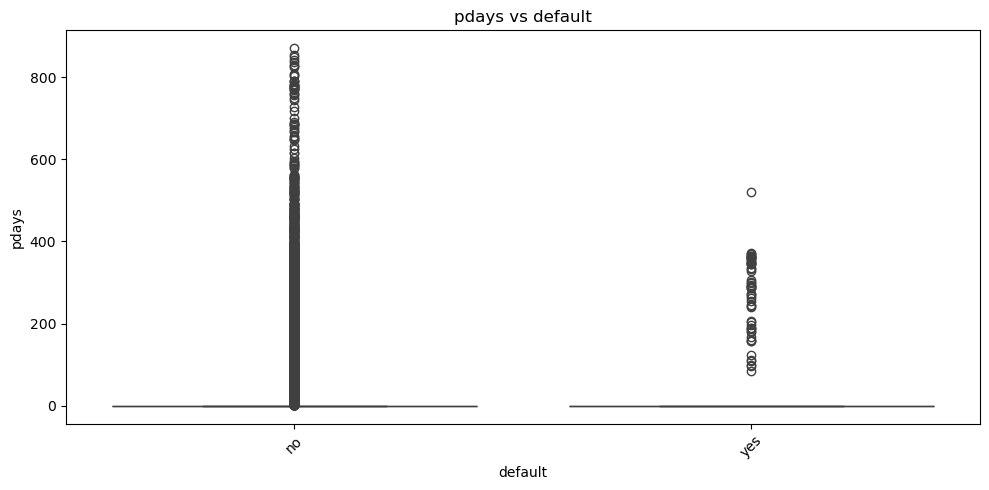

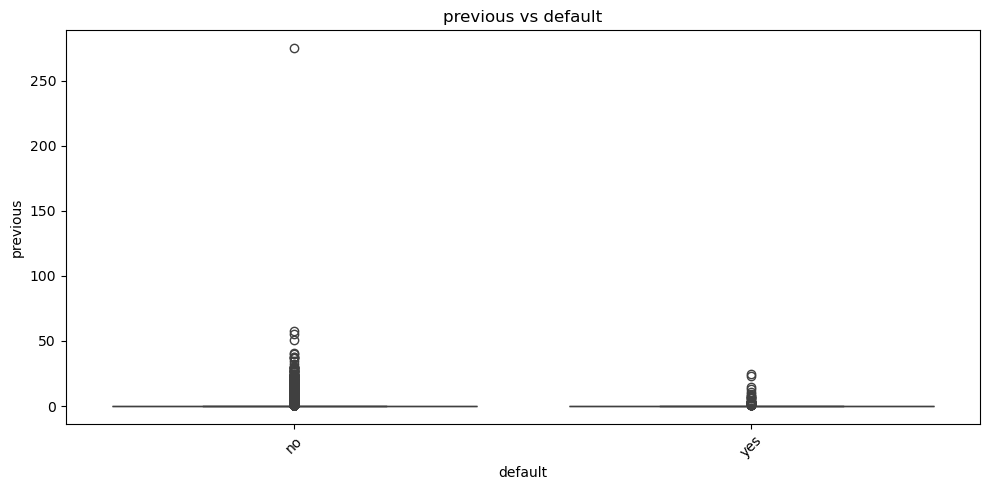

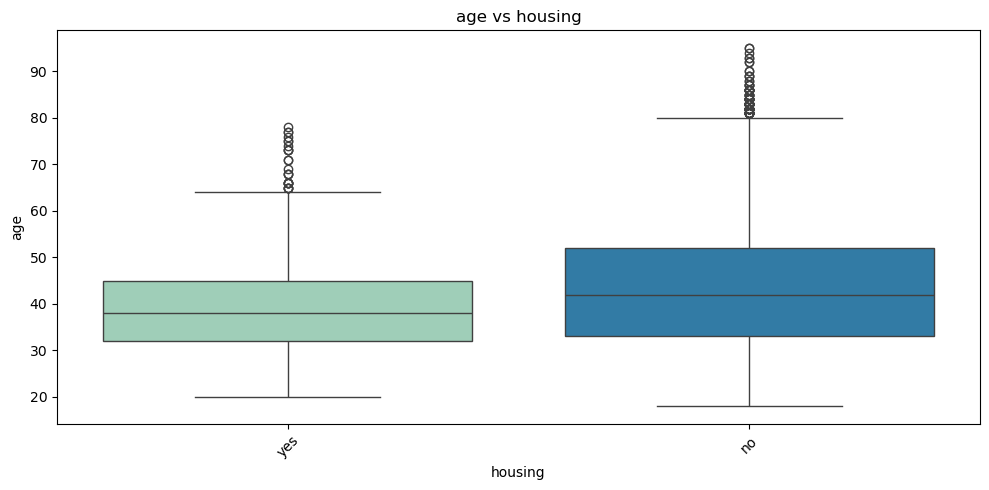

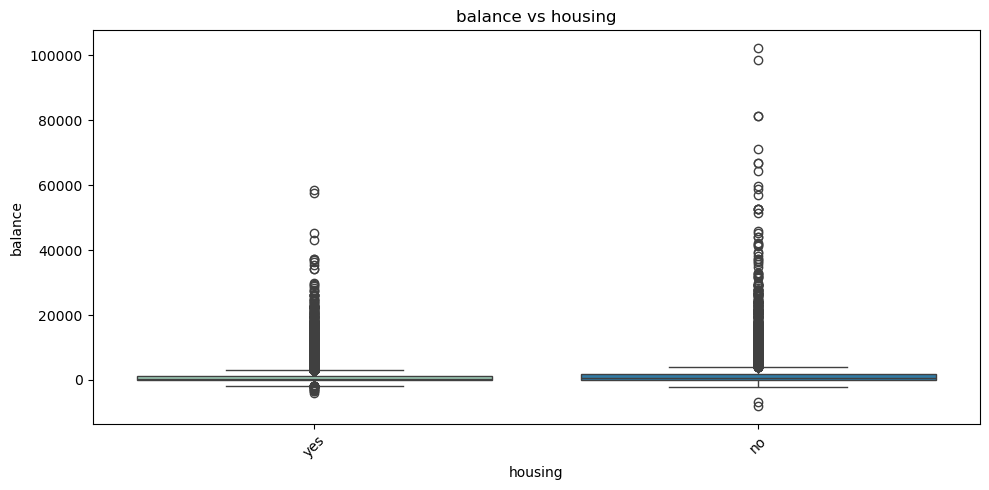

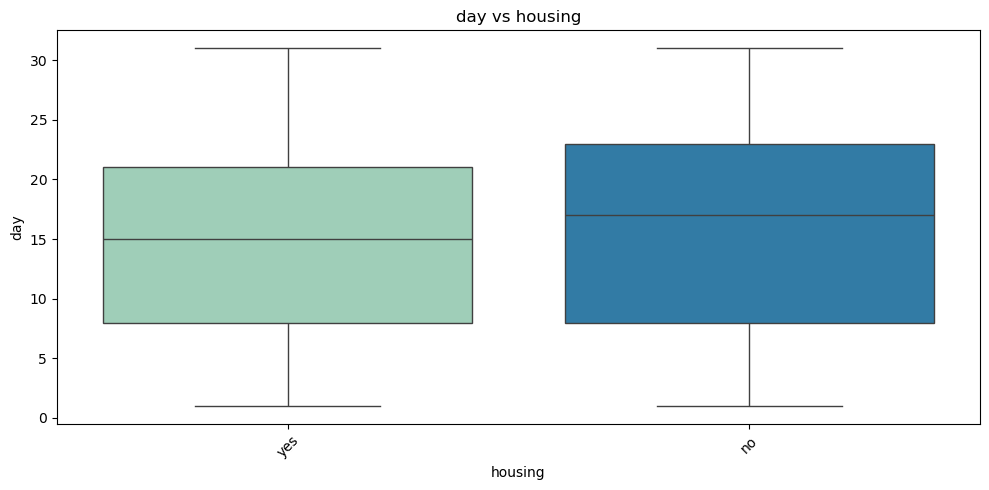

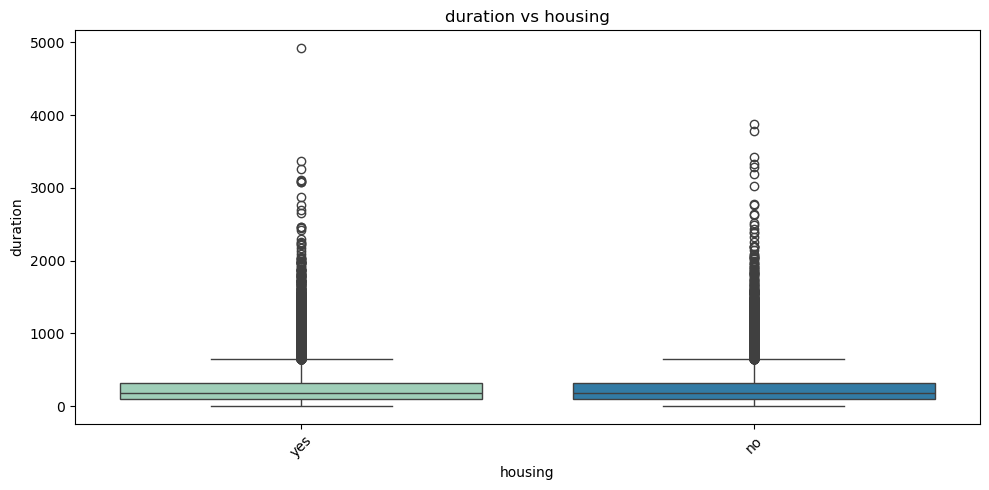

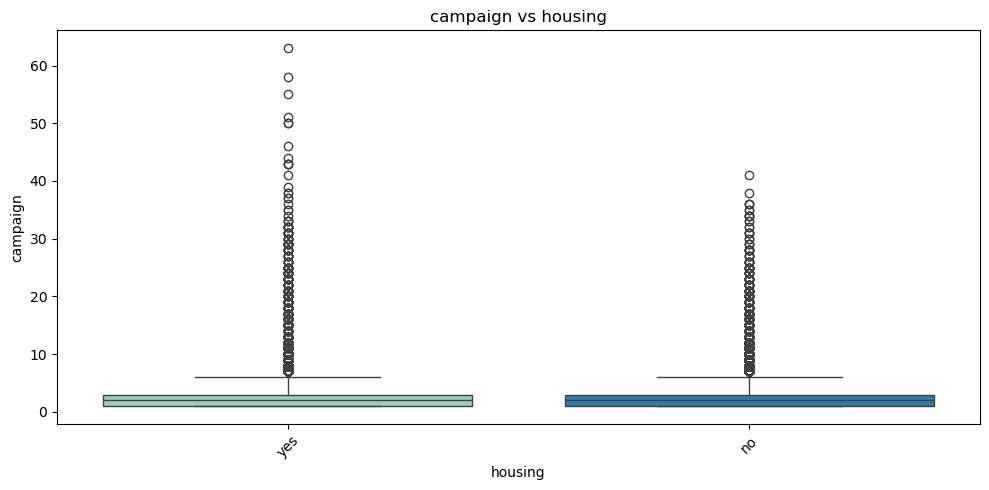

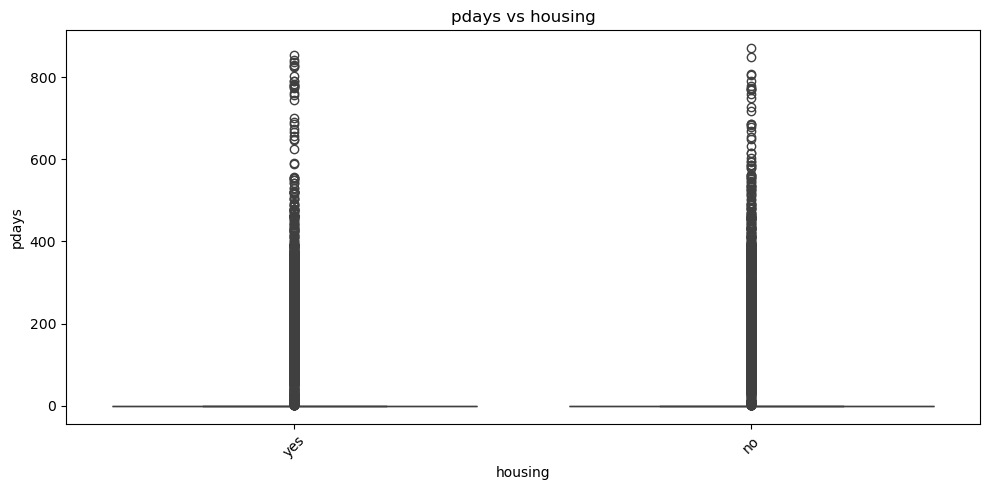

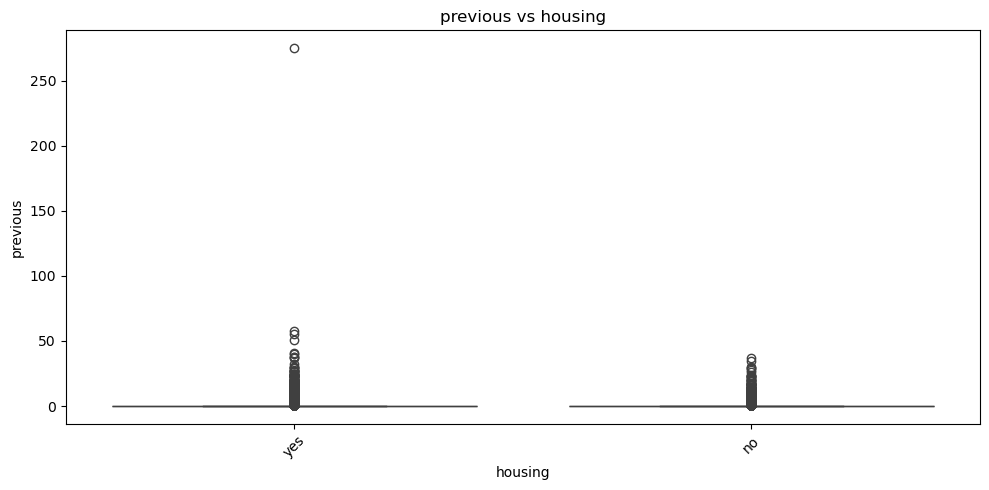

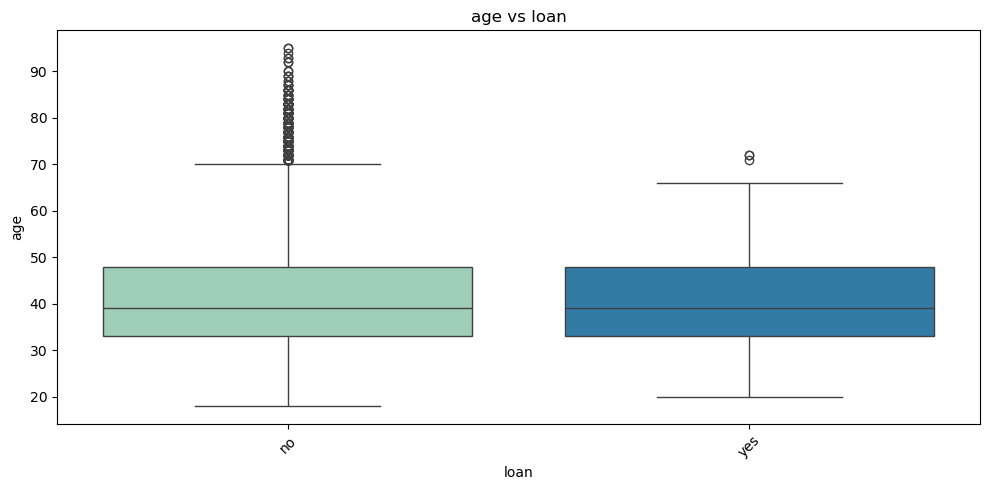

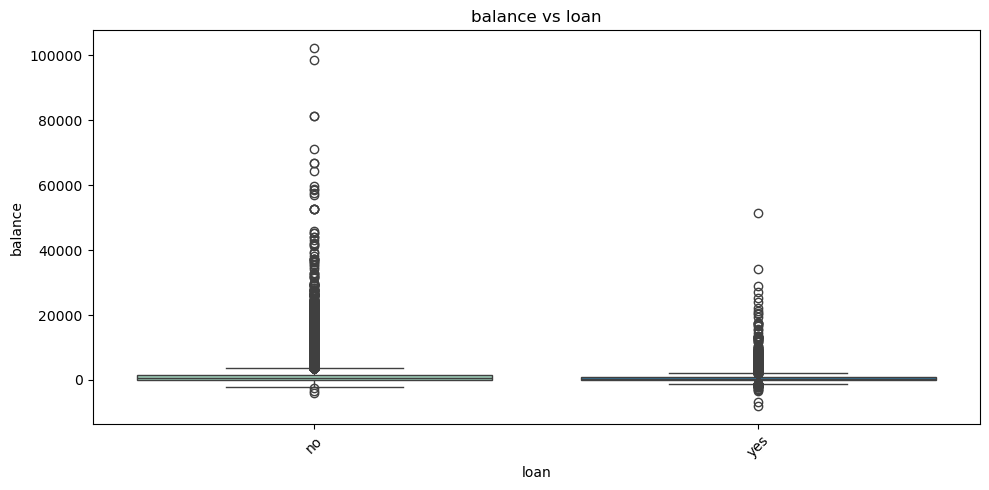

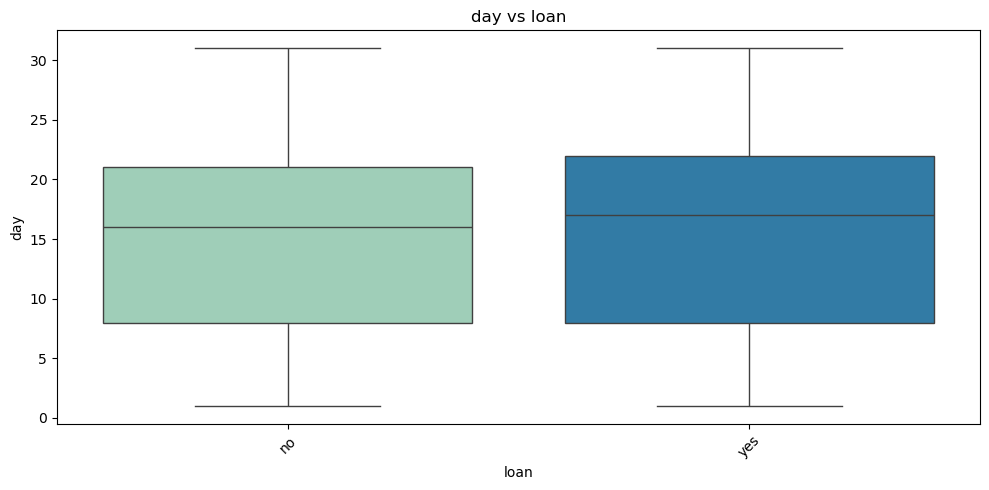

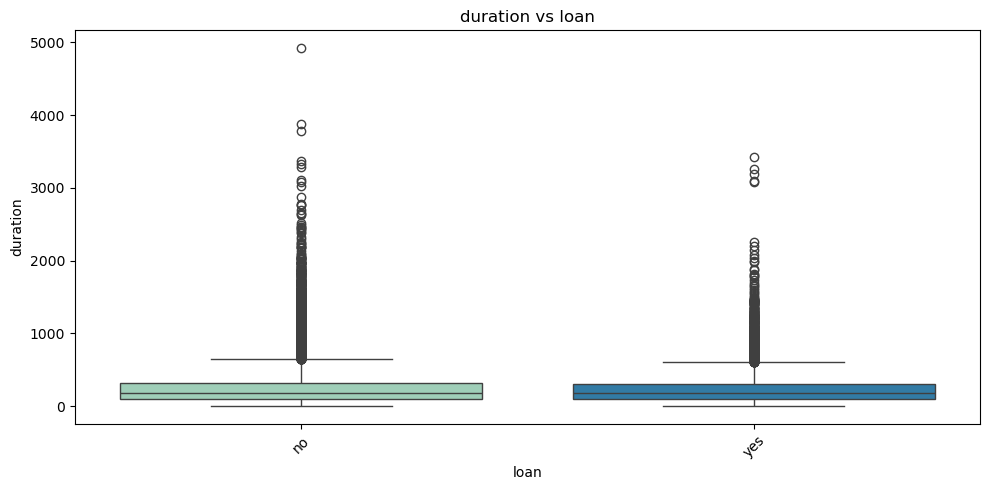

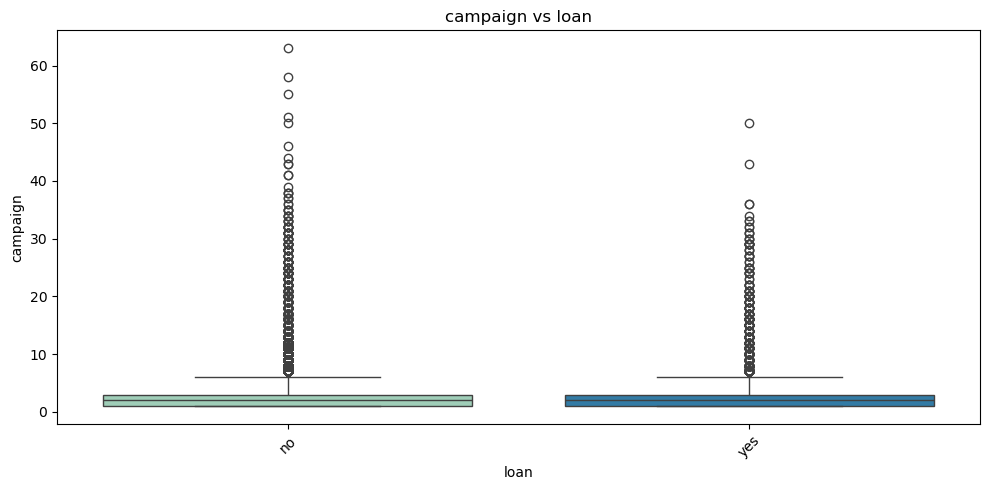

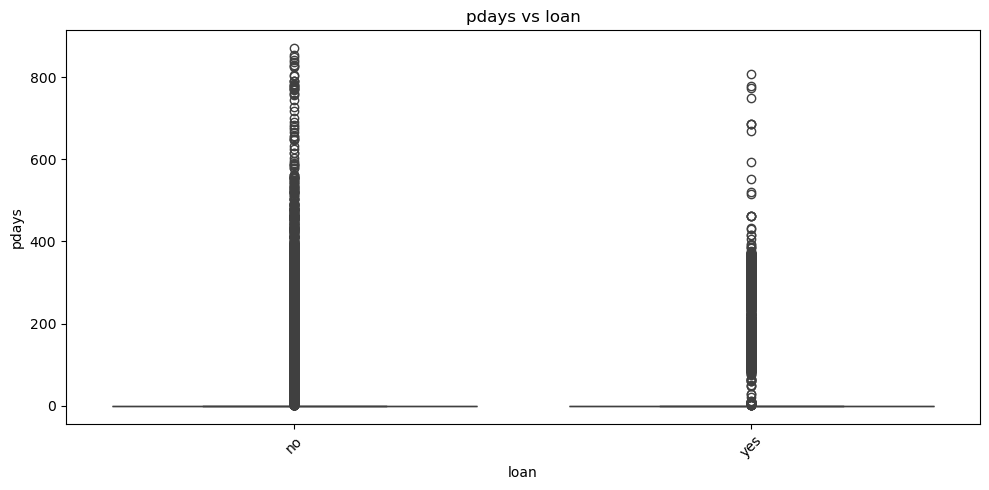

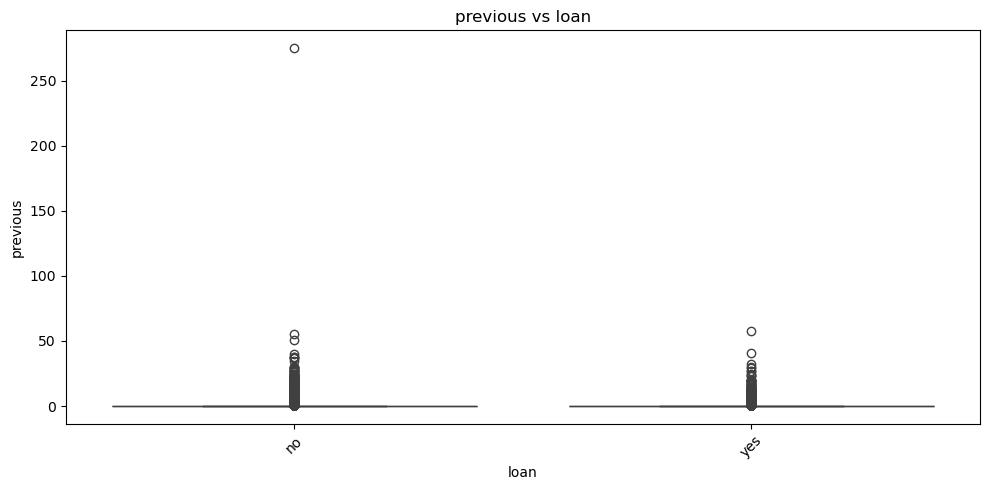

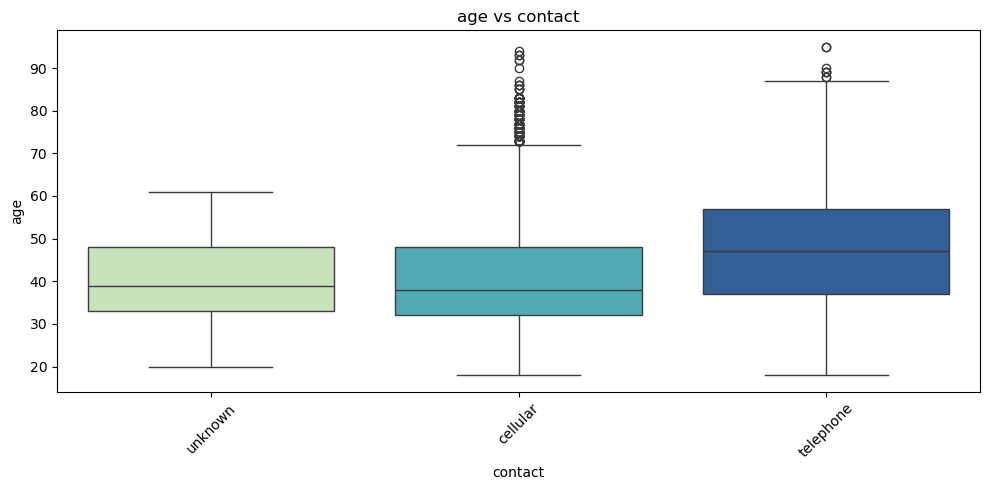

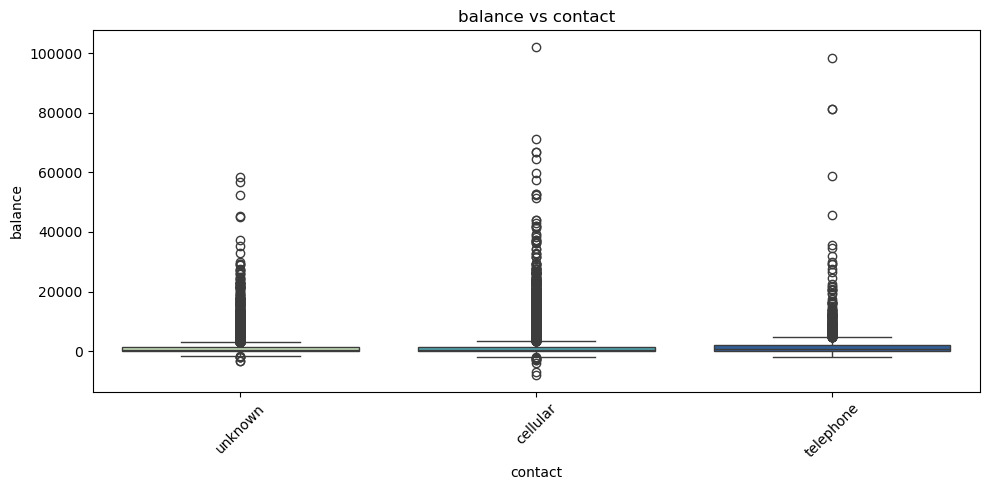

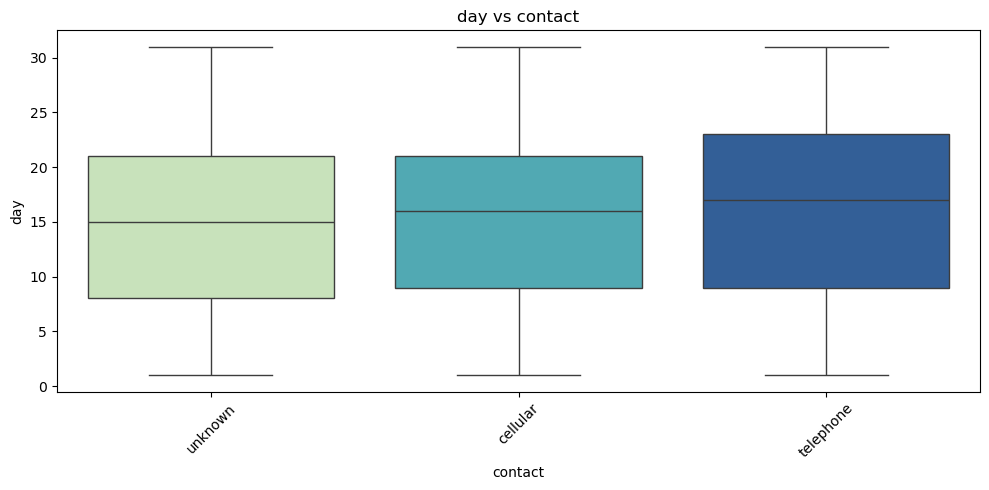

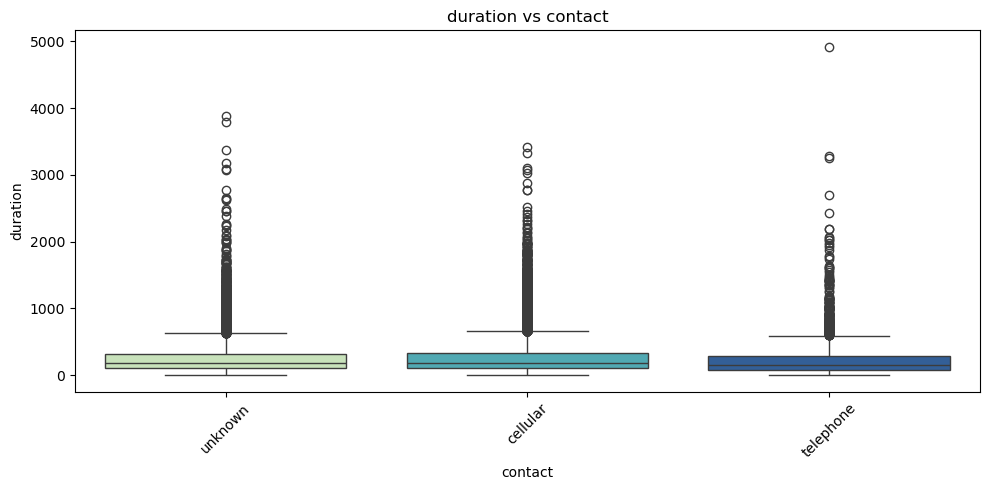

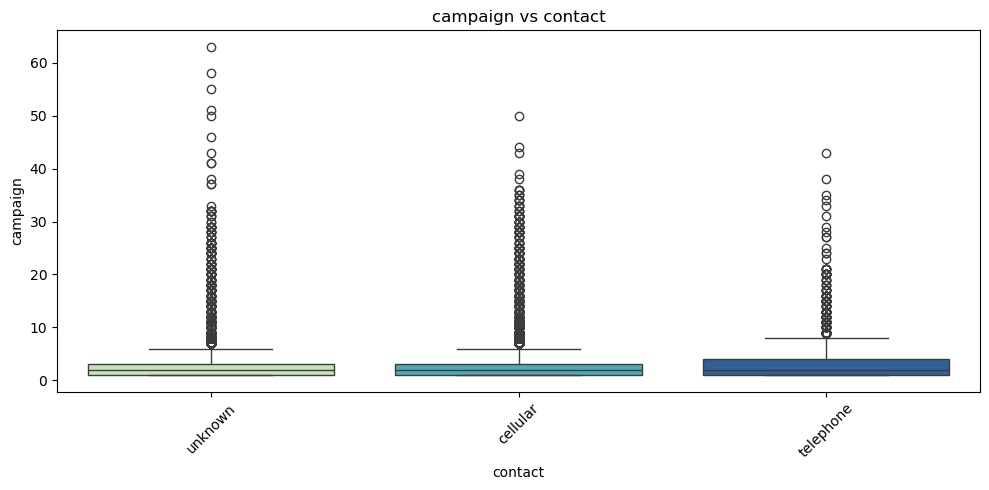

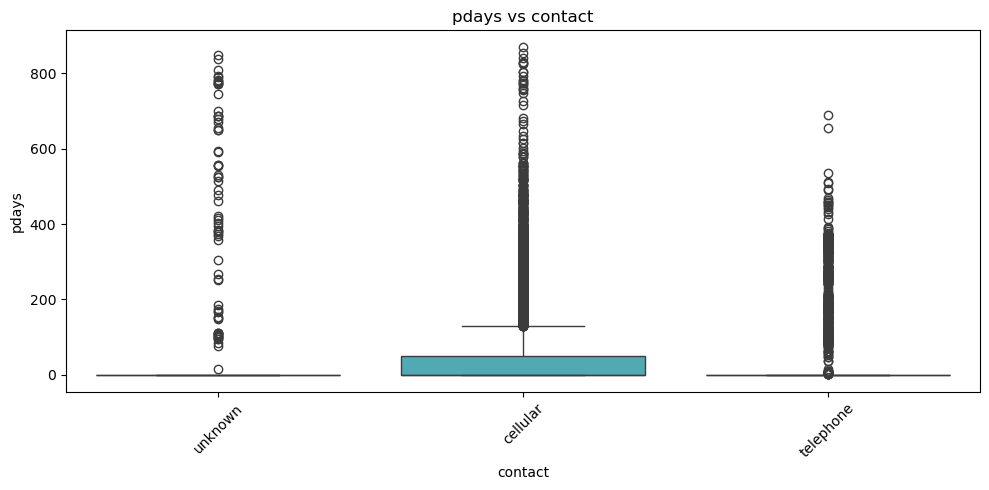

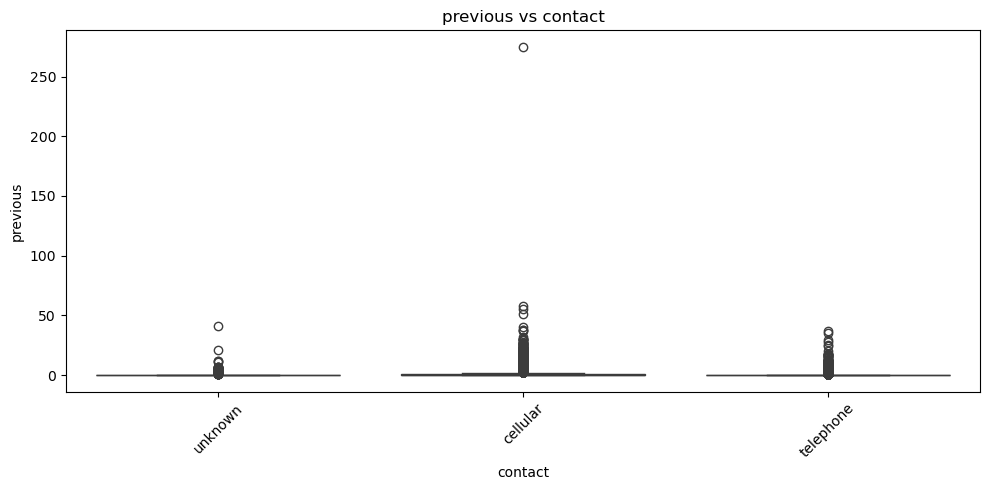

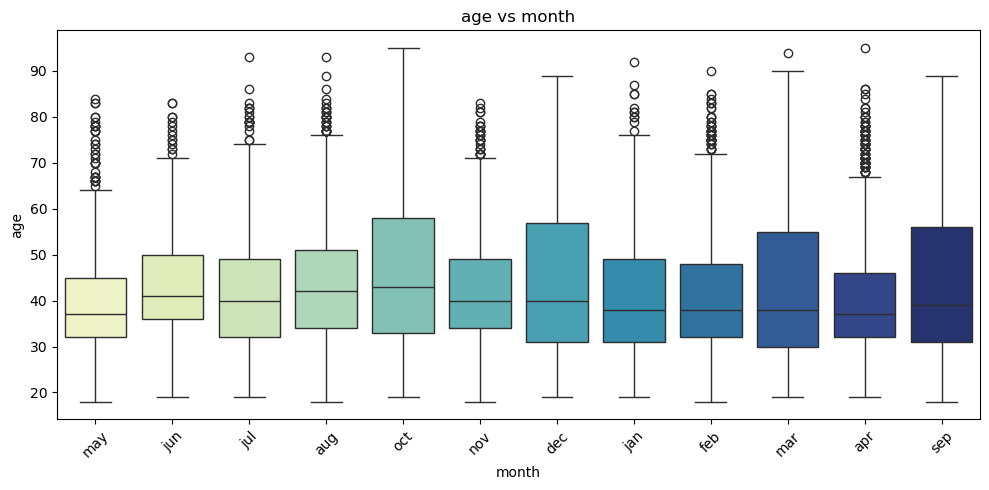

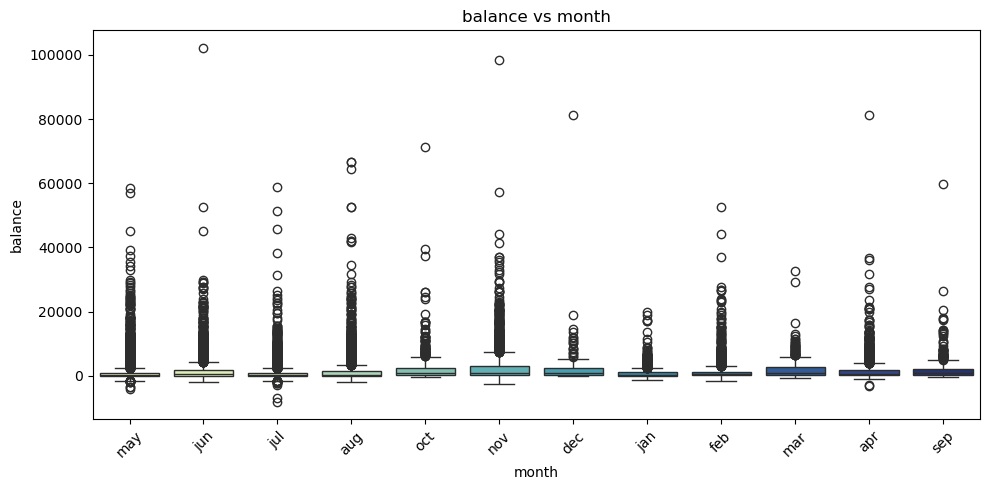

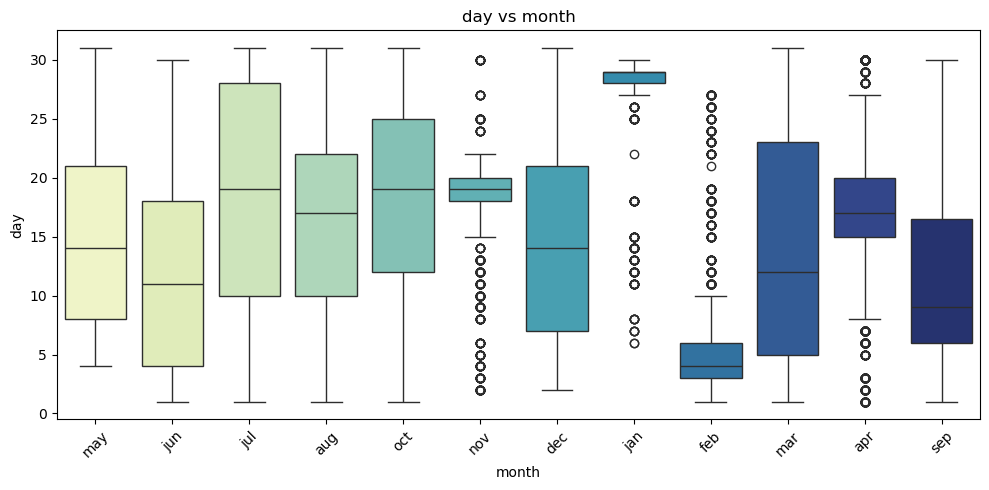

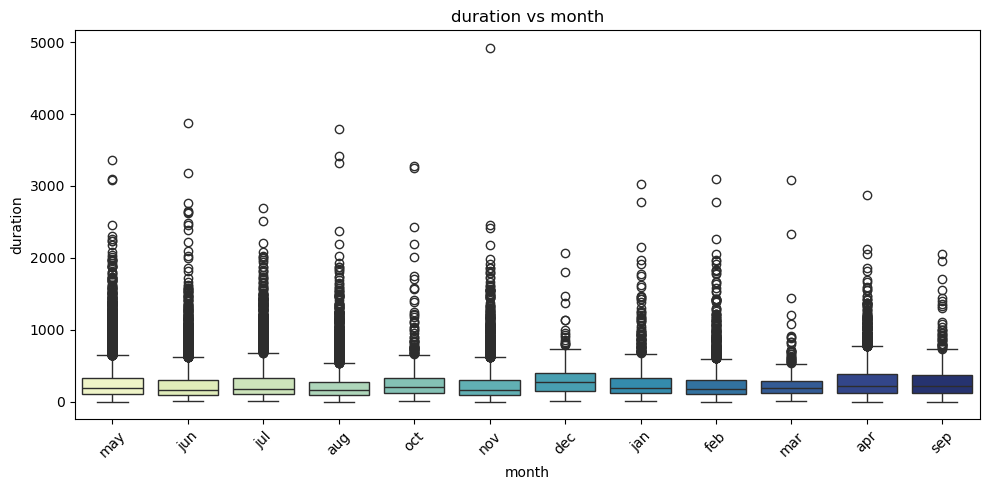

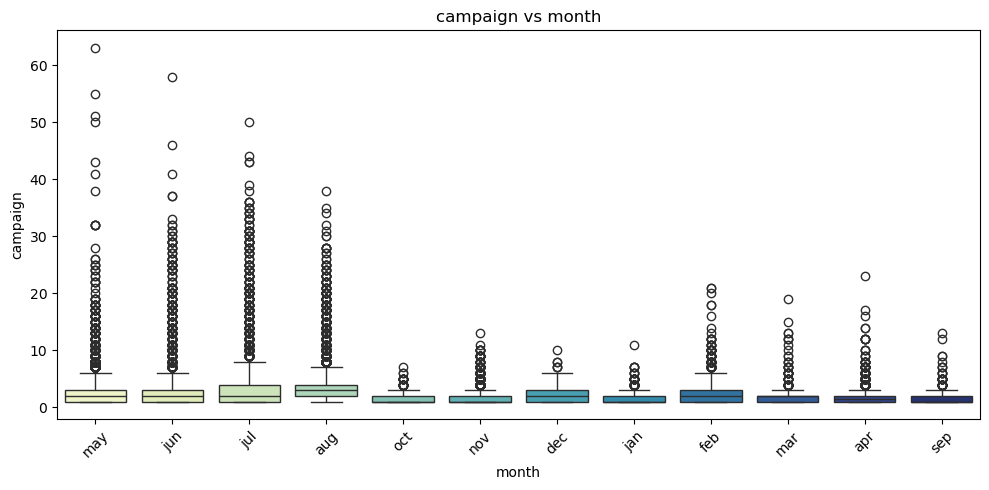

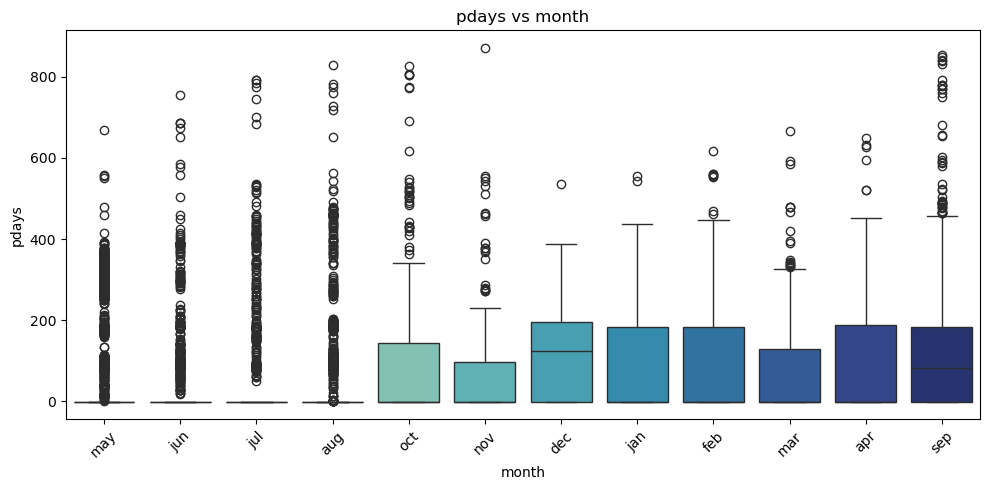

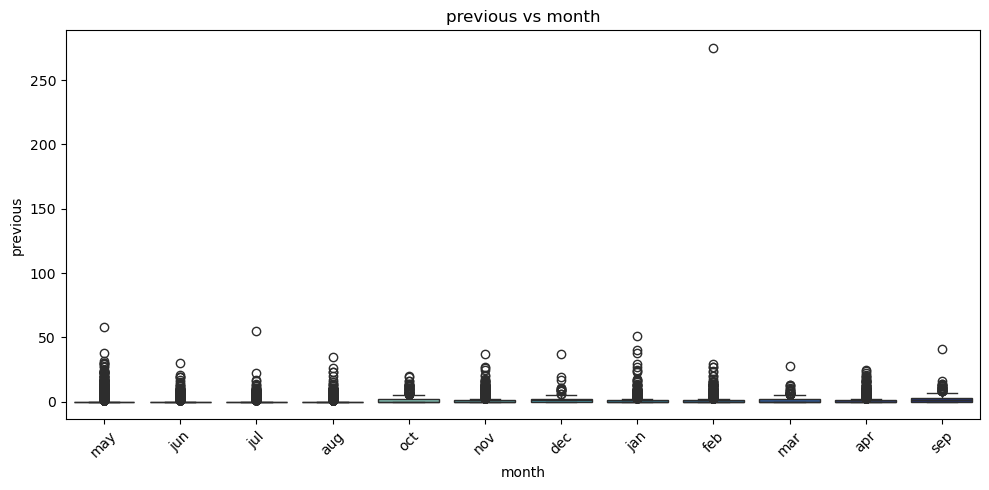

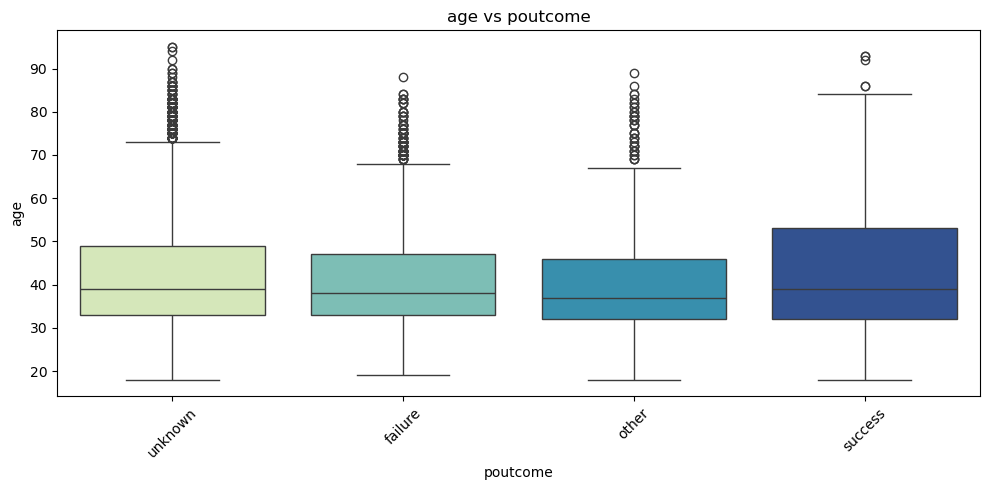

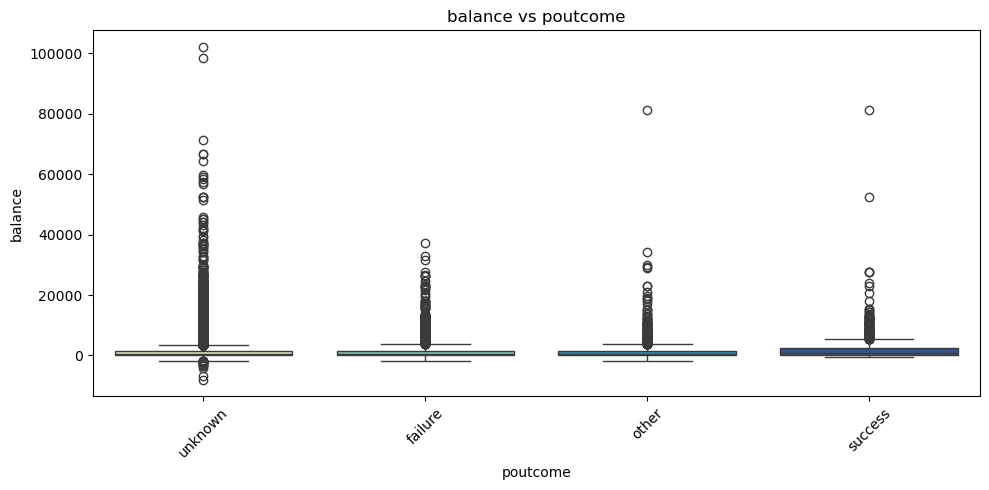

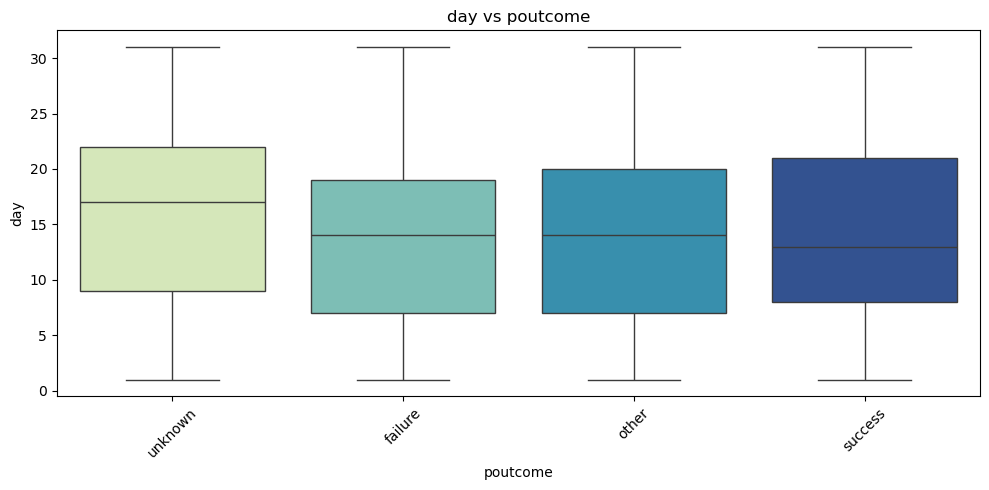

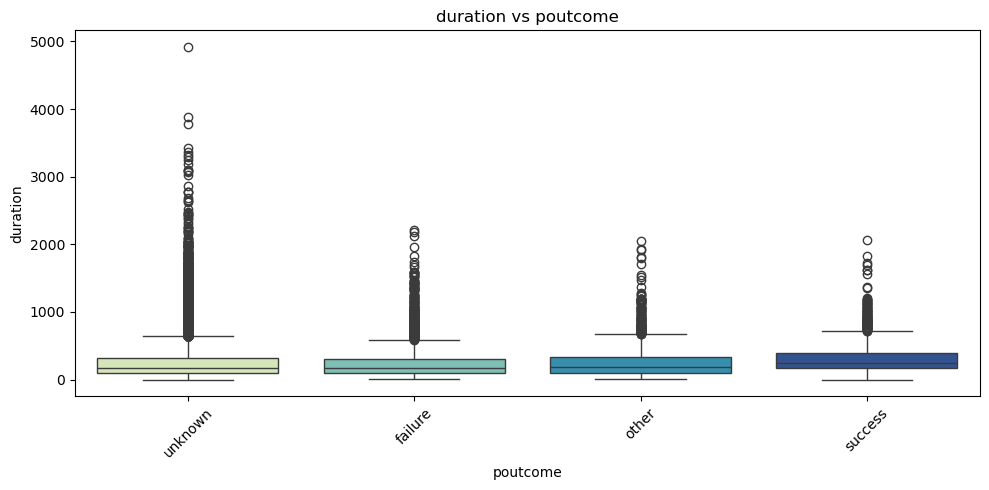

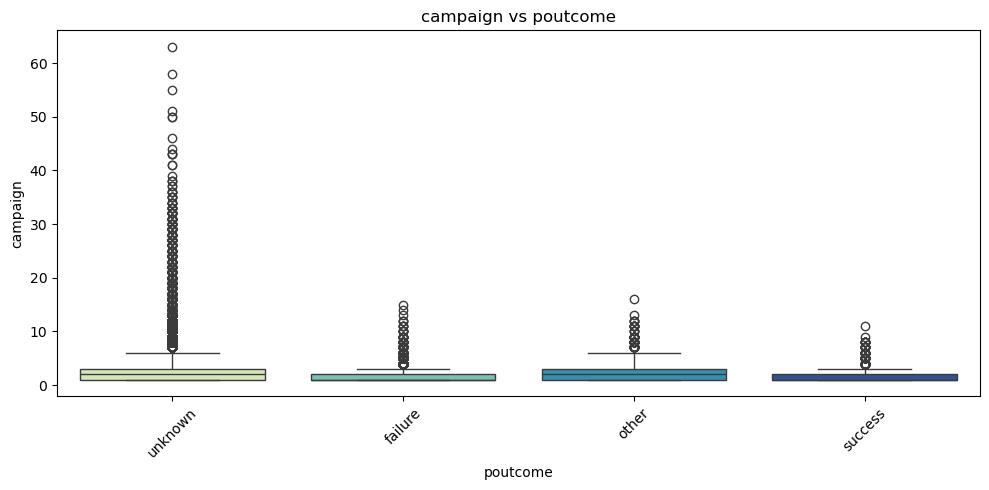

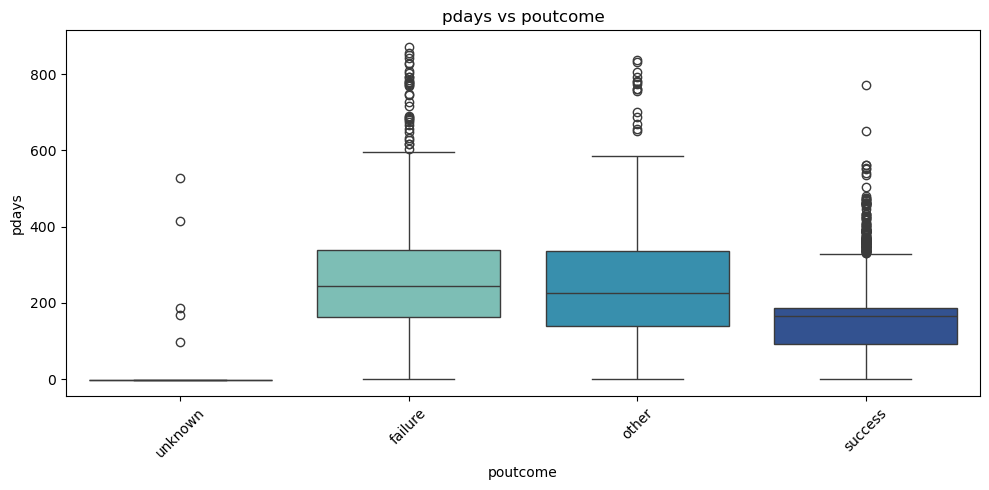

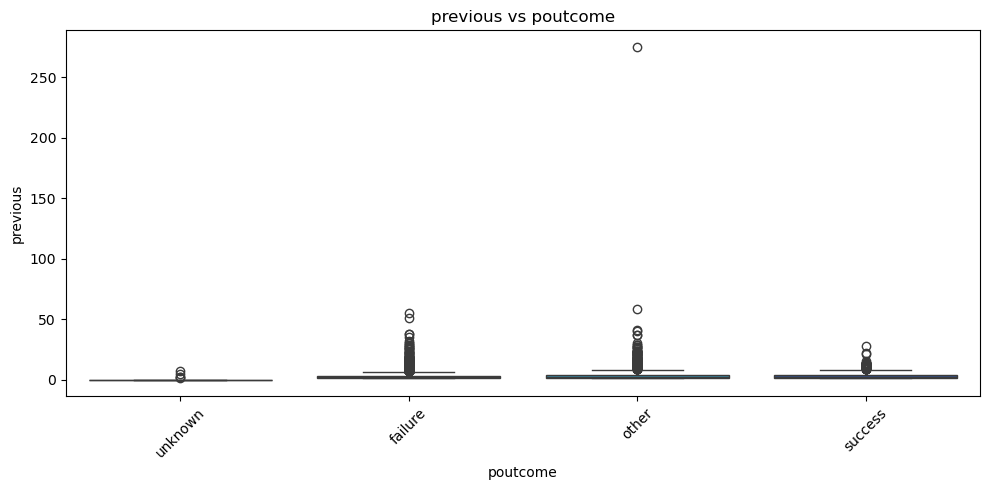

In [17]:
# boxplot of categorical features vs numerical features
for cat_feat in categorical_feature:
    for num_feat in numerical_feature:
        plt.figure(figsize=(10,5))
        sns.boxplot(x=cat_feat,y=num_feat,data=data,palette='YlGnBu')
        plt.title(f'{num_feat} vs {cat_feat}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show();

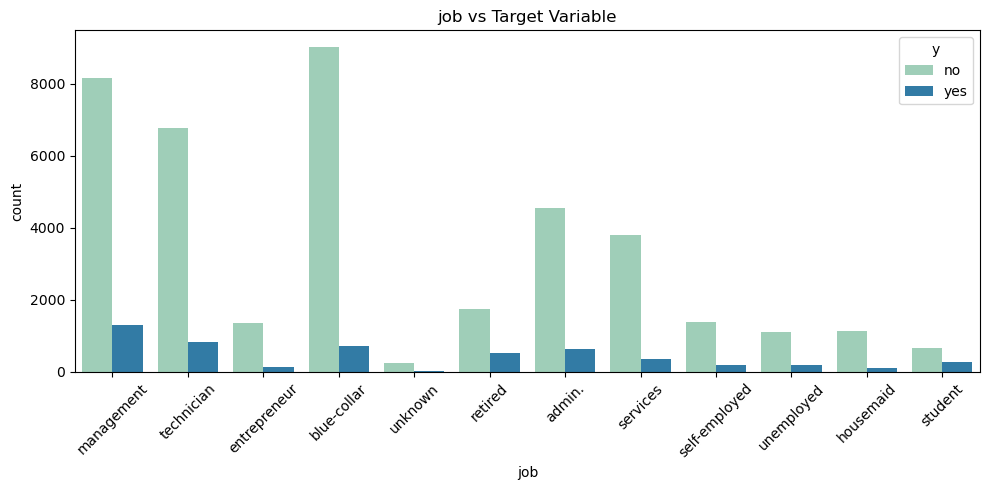

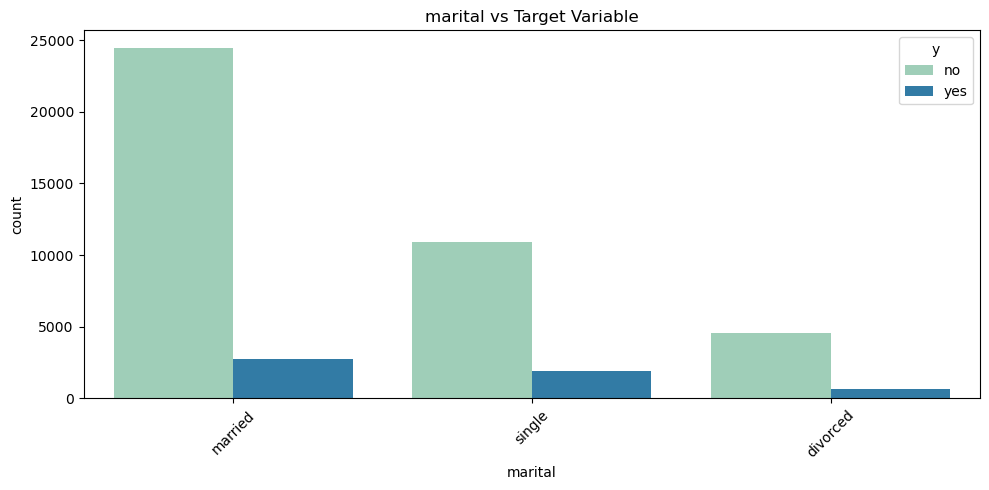

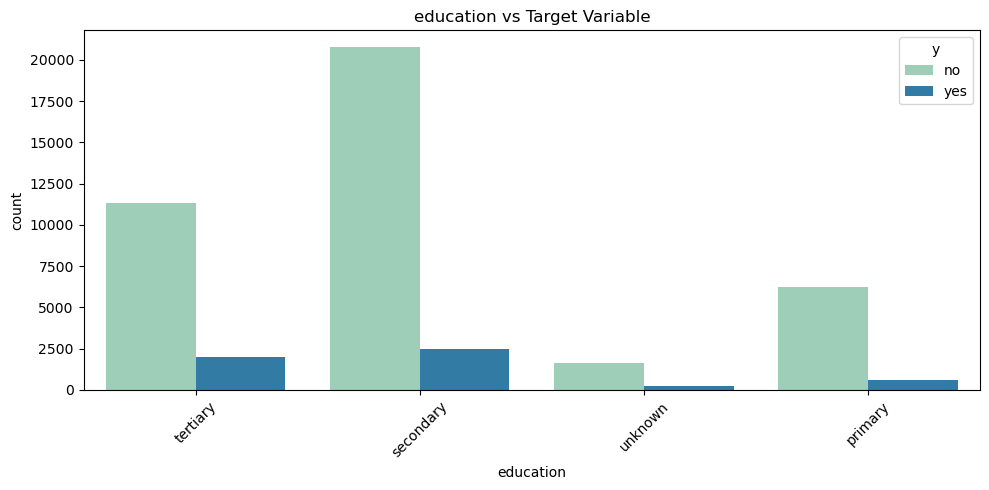

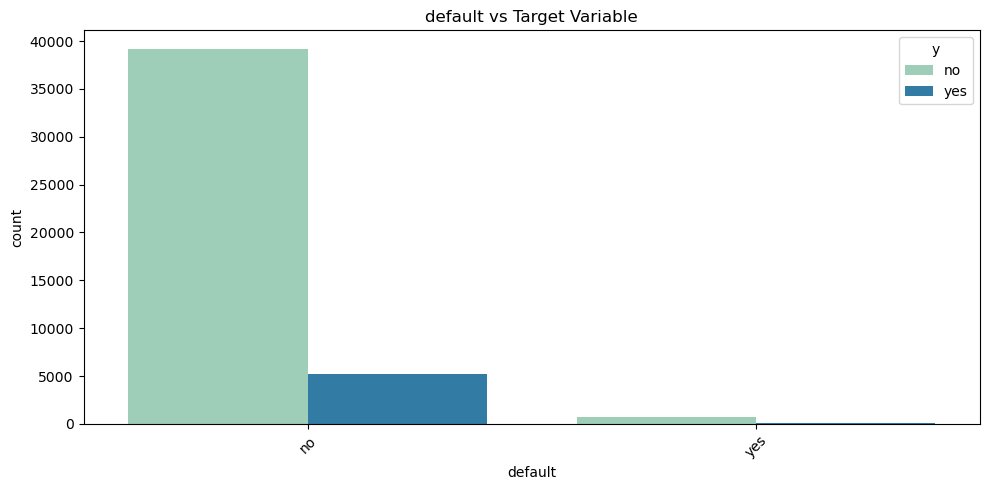

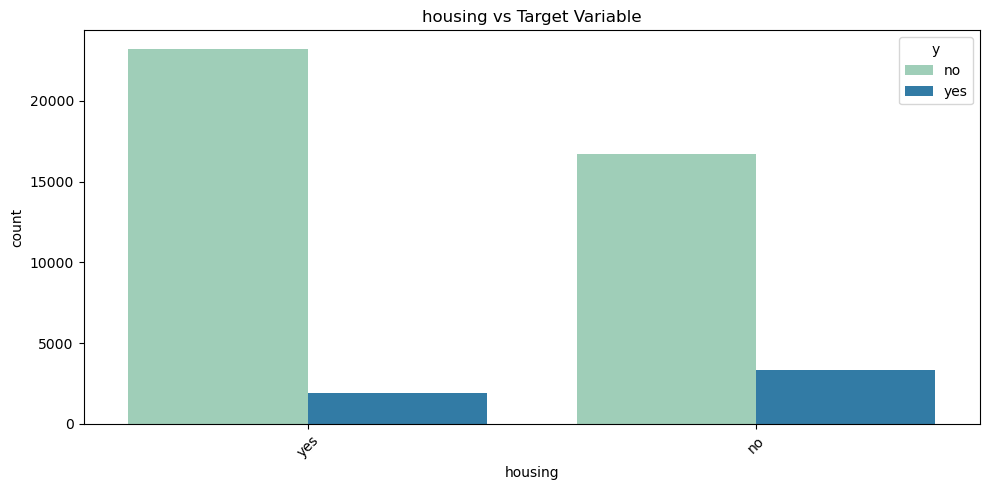

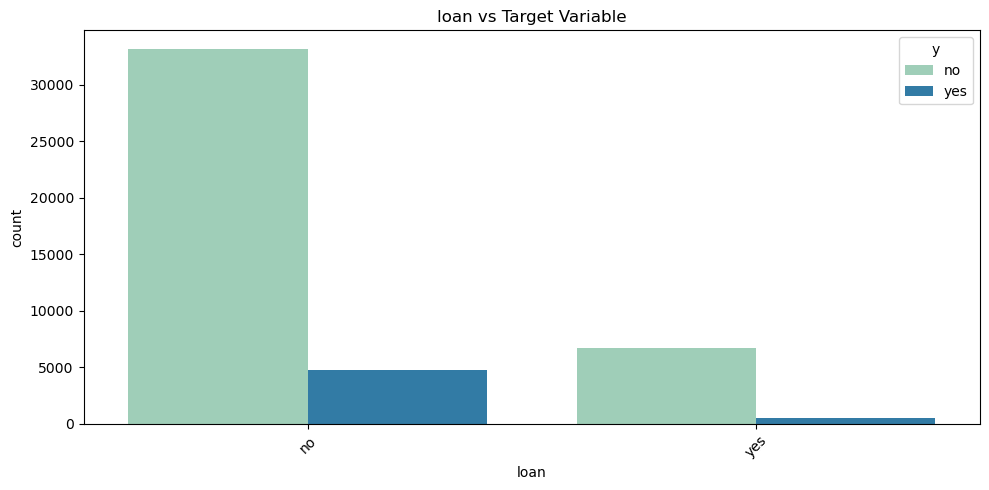

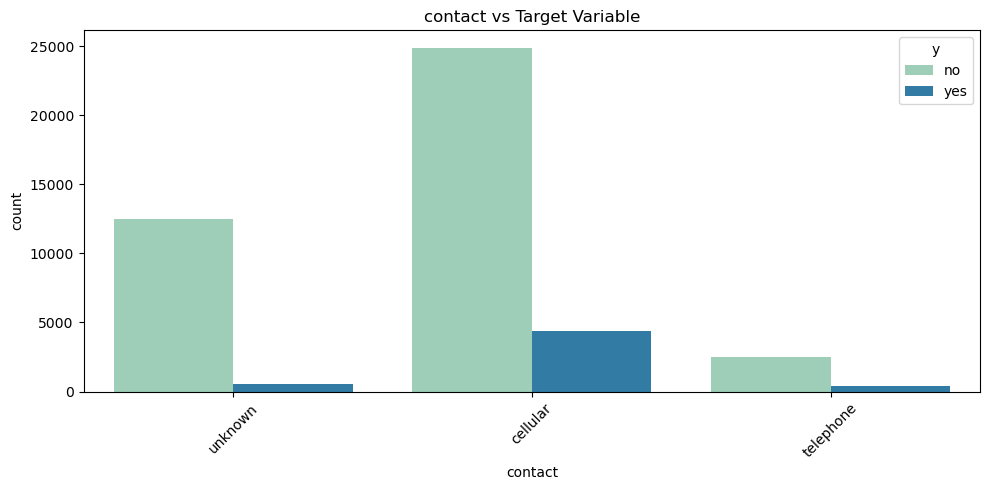

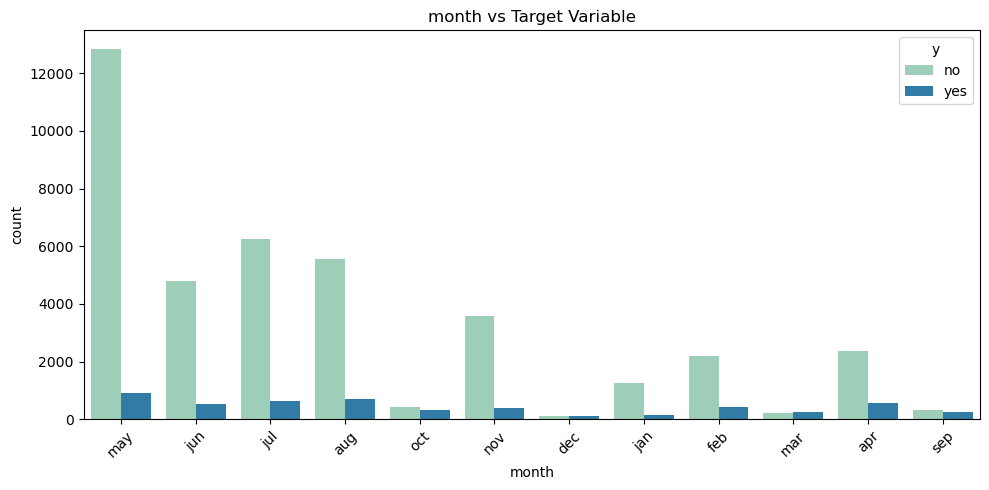

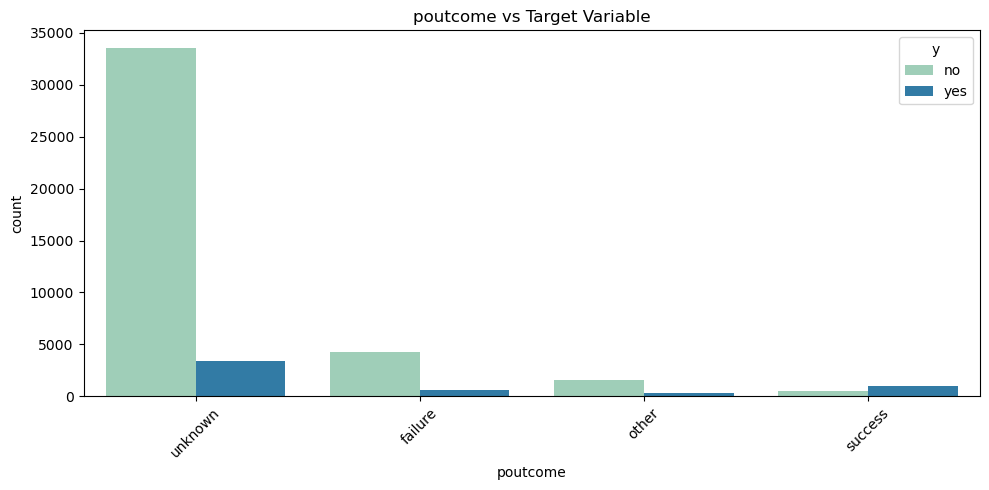

In [18]:
# countplot for categorical variables with hue as dependent variable
for feature in categorical_feature:
    plt.figure(figsize=(10,5))
    sns.countplot(x=feature,hue='y',data=data,palette='YlGnBu')
    plt.title(f'{feature} vs Target Variable')
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show();

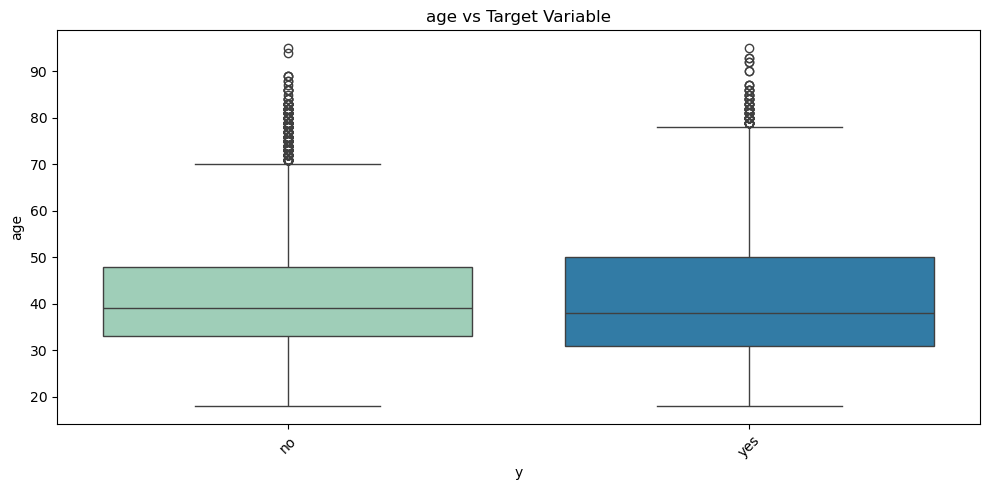

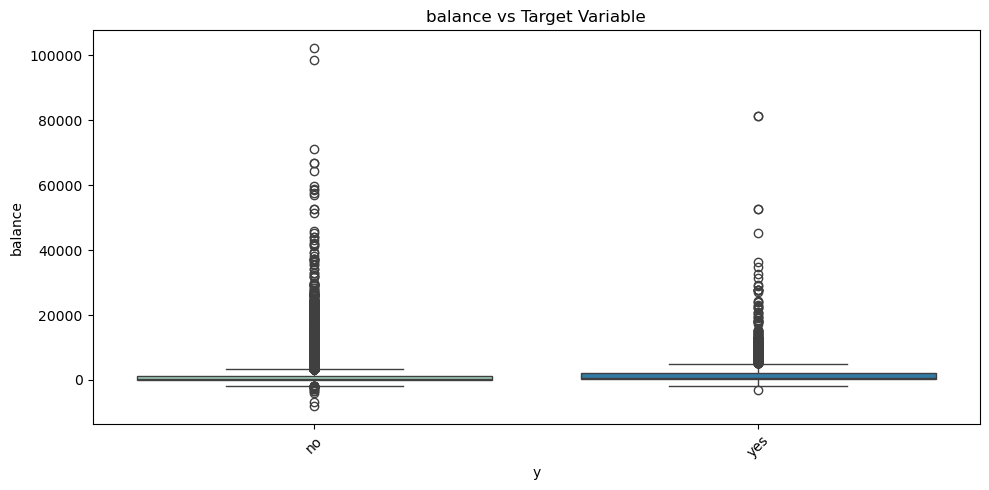

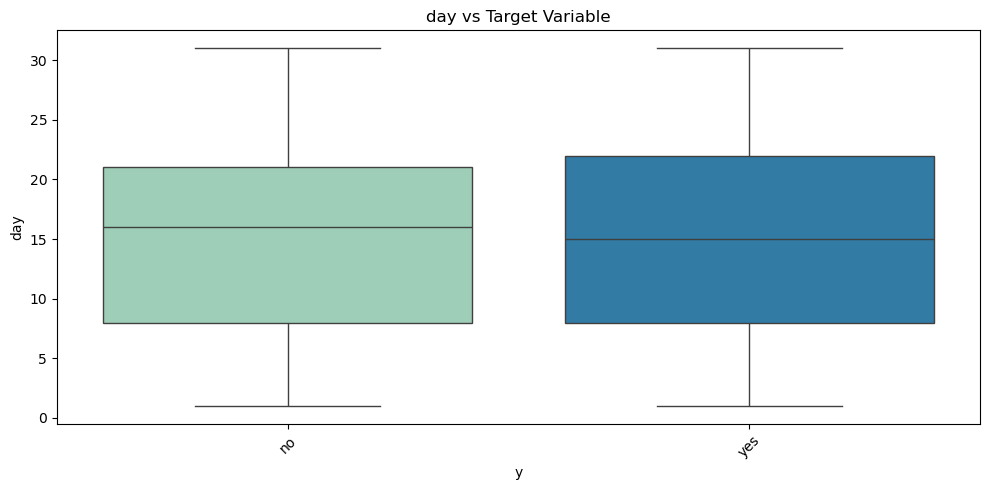

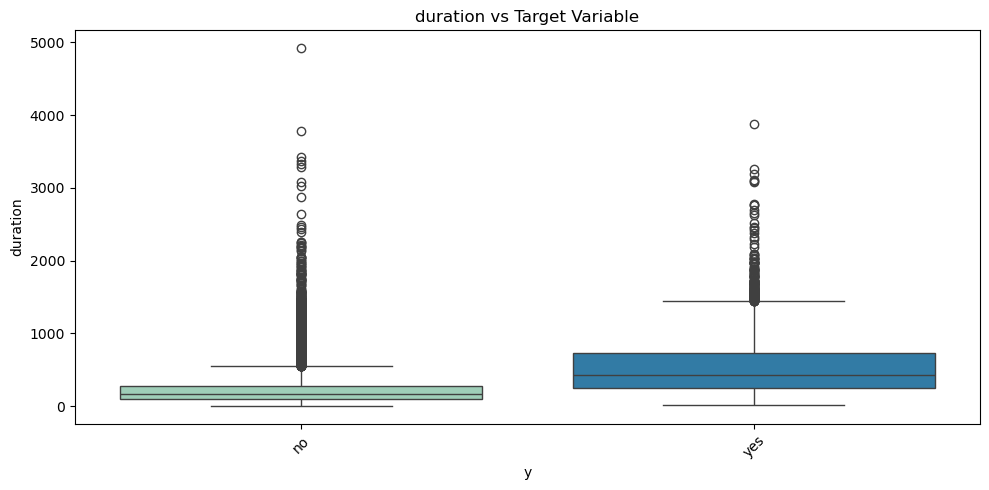

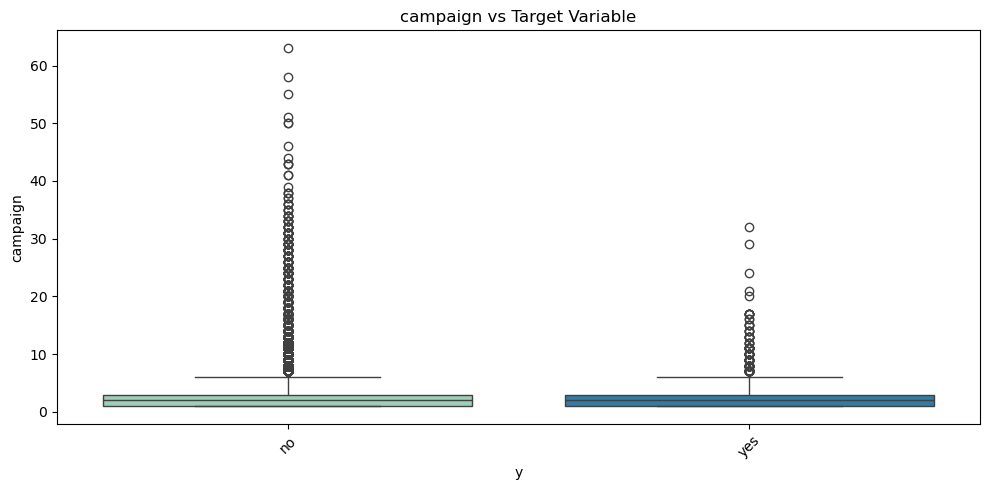

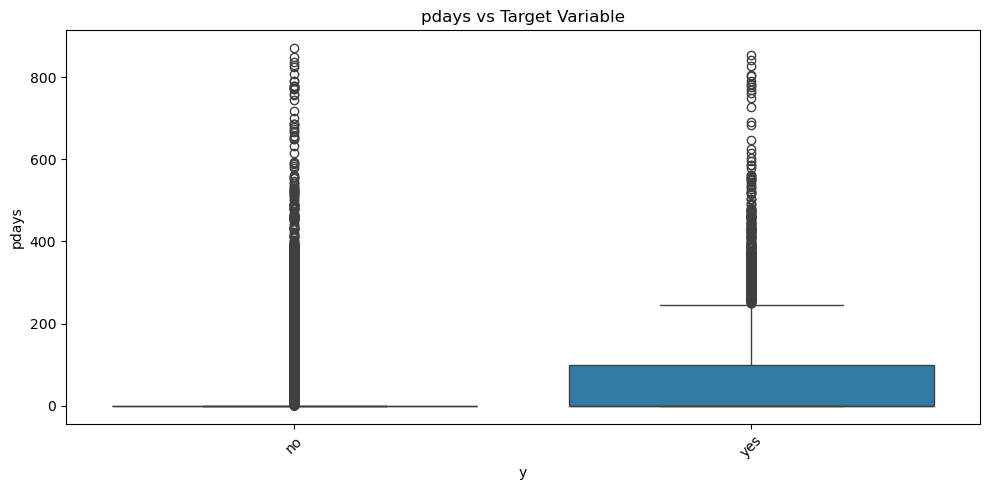

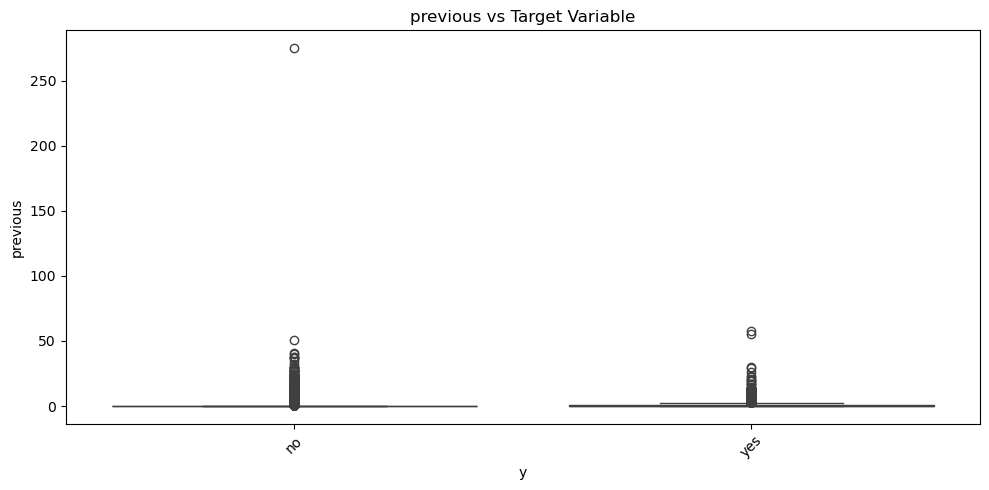

In [19]:
# boxplot for numerical variables vs dependent variable
for feature in numerical_feature:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='y',y=feature,data=data,palette='YlGnBu')
    plt.title(f'{feature} vs Target Variable')
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show();

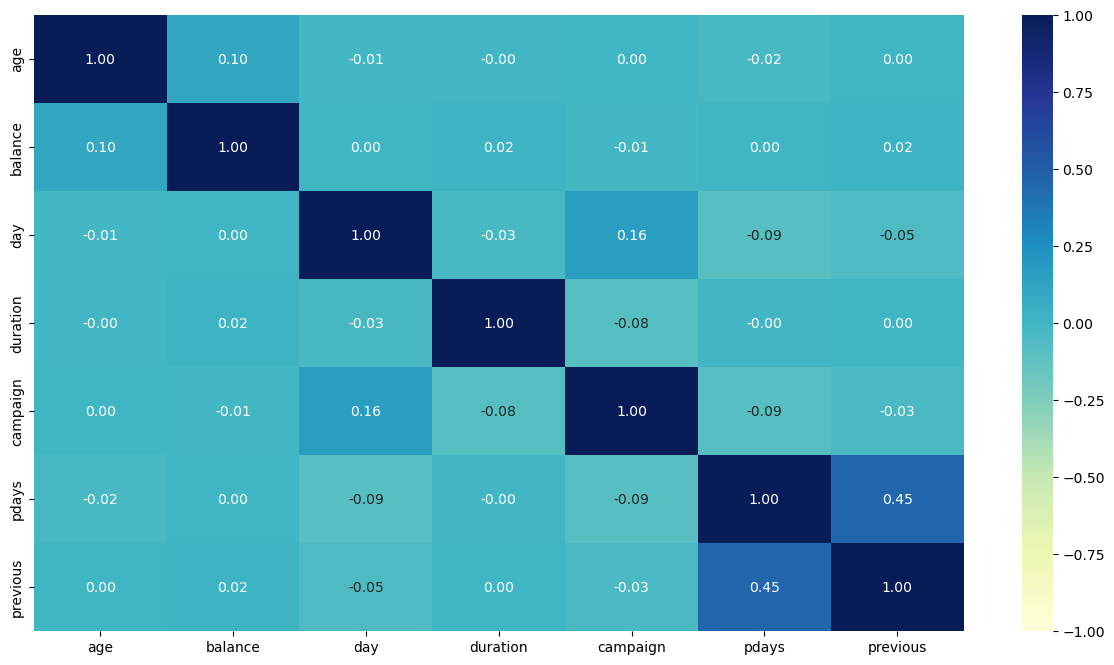

In [138]:
numerical_data = data.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(15,8))
sns.heatmap(numerical_data.corr(), vmin=-1,vmax=1,cmap='YlGnBu',annot=True,fmt='.2f')
plt.savefig('heatmap.png', bbox_inches='tight')
plt.show();

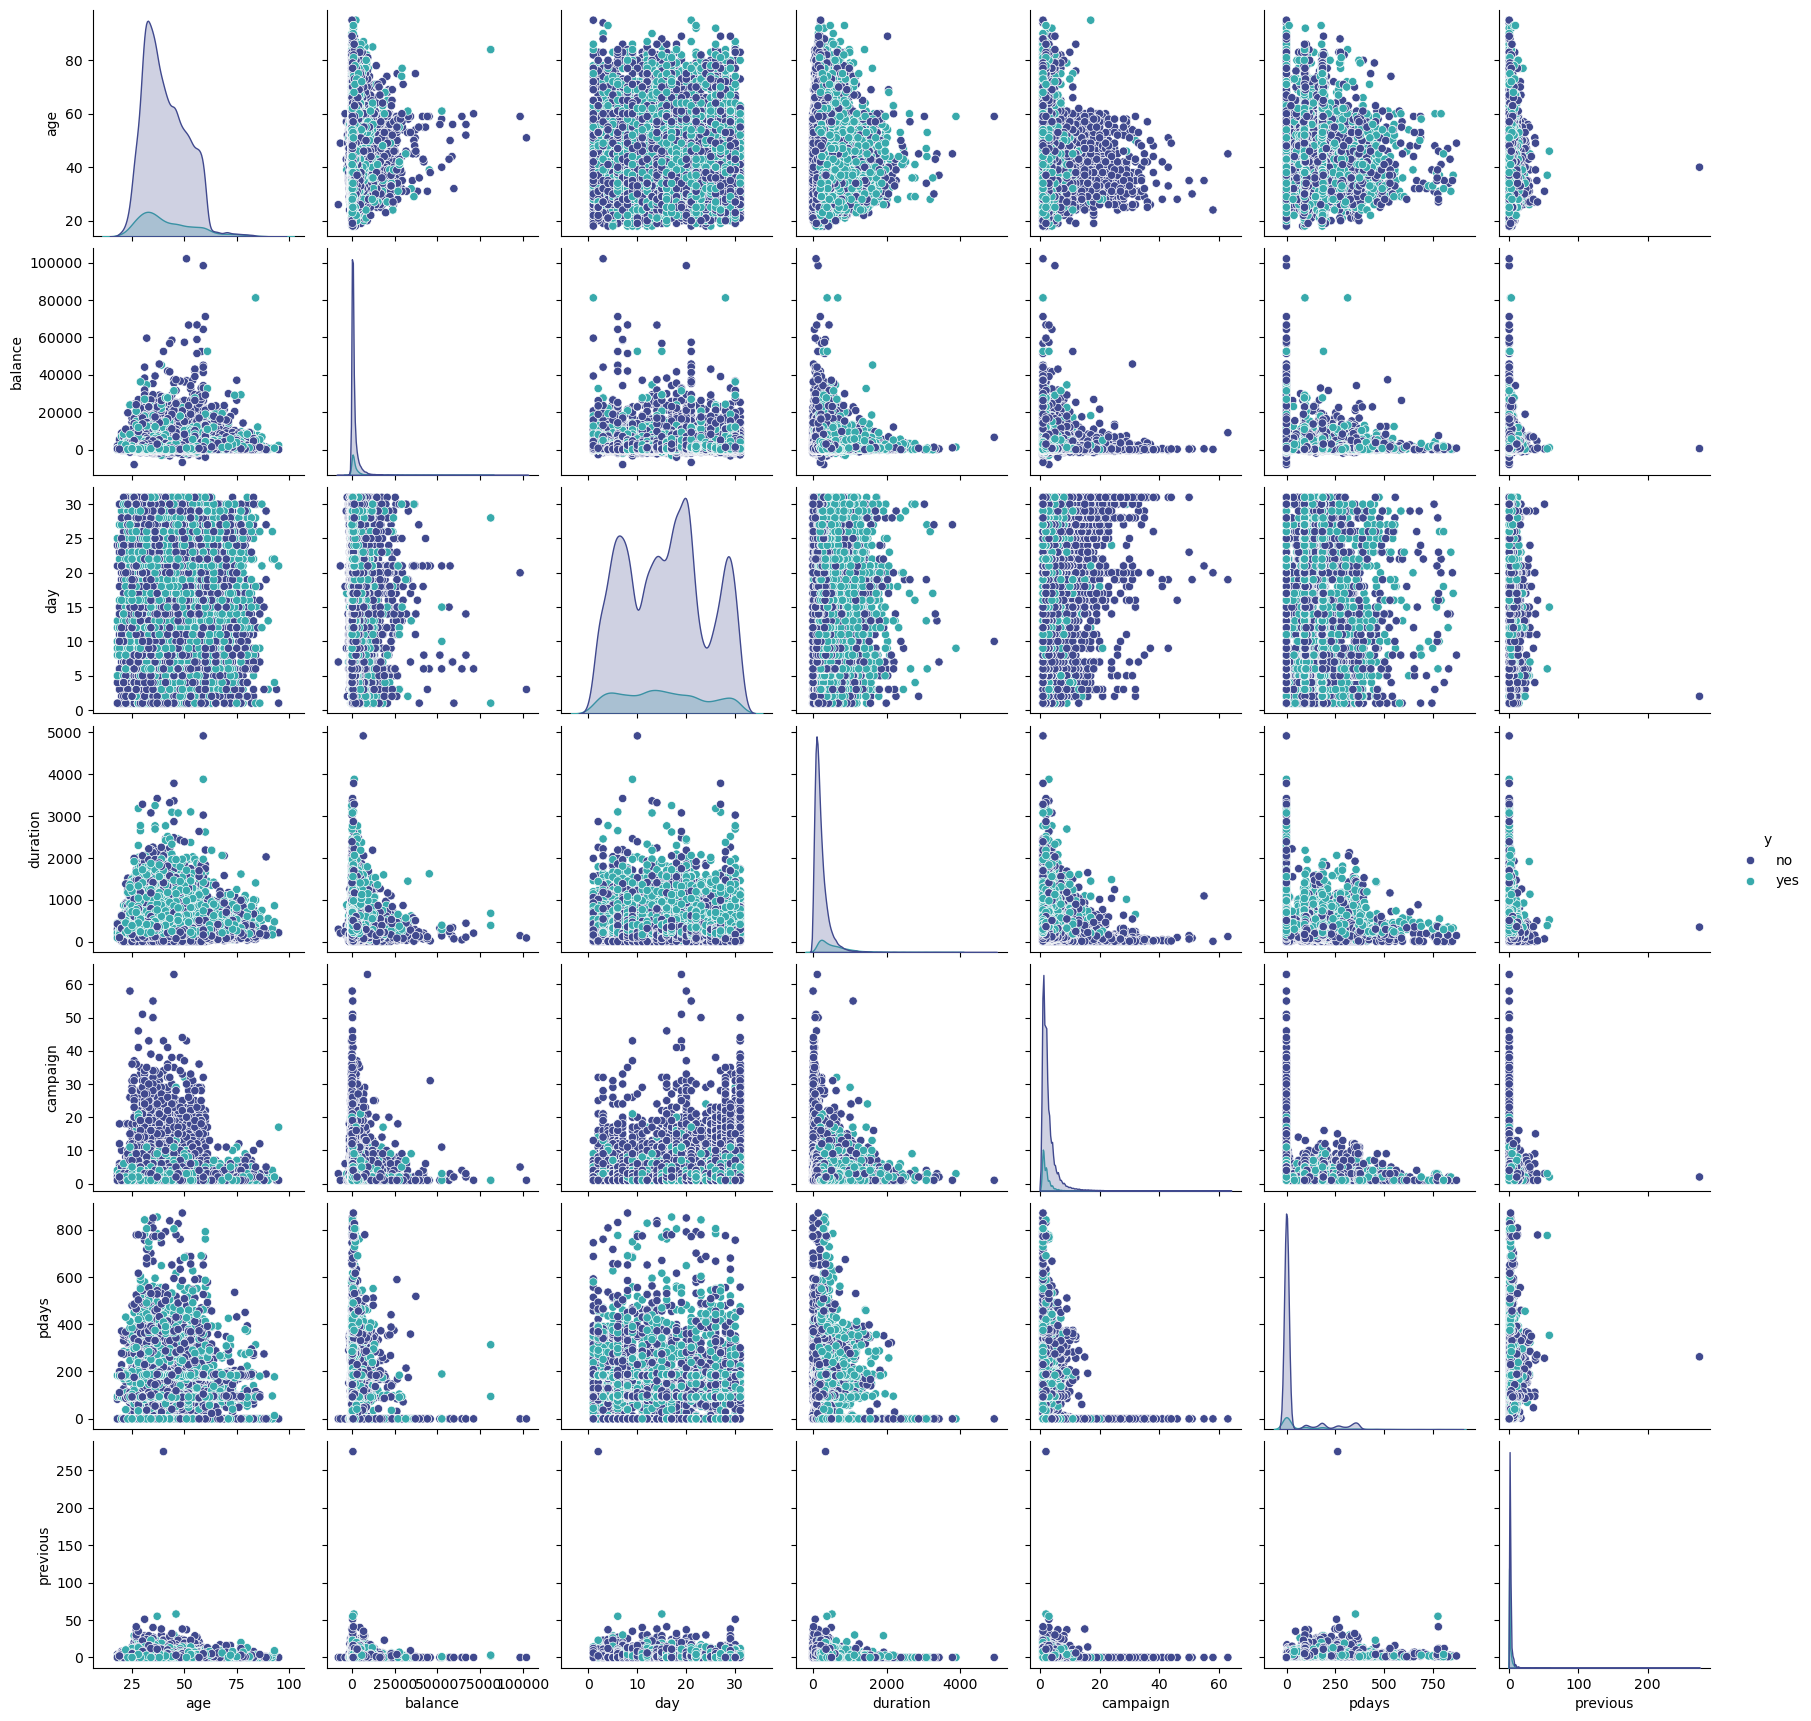

In [139]:
sns.pairplot(data, hue='y', palette='mako')
plt.savefig('pairplot.png', bbox_inches='tight')
plt.show();

### Feature Engineering

In [22]:
data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [23]:
# defining the categorical variables for one hot encoding
# and the numerical variables for scaling
ohe_feature = [feature for feature in data.columns if feature not in ['age','balance','day','duration','campaign','pdays','perivous','y']]
numerical_feature = [feature for feature in data.columns if feature not in ohe_feature and feature != 'y']

In [143]:
numerical_feature

['age', 'balance', 'day', 'duration', 'campaign', 'pdays']

In [24]:
# we will use the standard scaler for scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[numerical_feature] = scaler.fit_transform(data[numerical_feature])

In [25]:
# drop first is true to avoid multicollinearity, and we have dtype as int to get binary values for each category
data = pd.get_dummies(data, columns=ohe_feature, drop_first=True, dtype=int)
data.head()

age   balance       day  duration  campaign     pdays   y  \
0  1.606965  0.256419 -1.298476  0.011016 -0.569351 -0.411453  no   
1  0.288529 -0.437895 -1.298476 -0.416127 -0.569351 -0.411453  no   
2 -0.747384 -0.446762 -1.298476 -0.707361 -0.569351 -0.411453  no   
3  0.571051  0.047205 -1.298476 -0.645231 -0.569351 -0.411453  no   
4 -0.747384 -0.447091 -1.298476 -0.233620 -0.569351 -0.411453  no   

   job_blue-collar  job_entrepreneur  job_housemaid  ...  previous_38  \
0                0                 0              0  ...            0   
1                0                 0              0  ...            0   
2                0                 1              0  ...            0   
3                1                 0              0  ...            0   
4                0                 0              0  ...            0   

   previous_40  previous_41  previous_51  previous_55  previous_58  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   previous_275  poutcome_other  poutcome_success  poutcome_unknown  
0             0               0                 0                 1  
1             0               0                 0                 1  
2             0               0                 0                 1  
3             0               0                 0                 1  
4             0               0                 0                 1  

[5 rows x 82 columns]

### Splitting the data into train-test

In [26]:
# splitting the dataset into x and y for training and testing data
from sklearn.model_selection import train_test_split
x = data.drop('y', axis=1)
y = data['y']
y = y.map({'no':0,'yes':1})
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [144]:
x_train.shape

(31647, 14)

In [145]:
x_test.shape

(13564, 14)

In [27]:
x.head()

age   balance       day  duration  campaign     pdays  \
0  1.606965  0.256419 -1.298476  0.011016 -0.569351 -0.411453   
1  0.288529 -0.437895 -1.298476 -0.416127 -0.569351 -0.411453   
2 -0.747384 -0.446762 -1.298476 -0.707361 -0.569351 -0.411453   
3  0.571051  0.047205 -1.298476 -0.645231 -0.569351 -0.411453   
4 -0.747384 -0.447091 -1.298476 -0.233620 -0.569351 -0.411453   

   job_blue-collar  job_entrepreneur  job_housemaid  job_management  ...  \
0                0                 0              0               1  ...   
1                0                 0              0               0  ...   
2                0                 1              0               0  ...   
3                1                 0              0               0  ...   
4                0                 0              0               0  ...   

   previous_38  previous_40  previous_41  previous_51  previous_55  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   previous_58  previous_275  poutcome_other  poutcome_success  \
0            0             0               0                 0   
1            0             0               0                 0   
2            0             0               0                 0   
3            0             0               0                 0   
4            0             0               0                 0   

   poutcome_unknown  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  

[5 rows x 81 columns]

### Feature Selection

In [28]:
# now that out data is ready and we have total 81 columns, we will perform feature selection using the Lasso model
# this will help us select only relevant features that will actually contribute to the model prediction
# Lasso stands for LEAST ABSOLUTE SHRINKAGE AND SELECTION OPERATOR
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
selection_model = SelectFromModel(Lasso(alpha=0.005, random_state=1))
selection_model.fit_transform(x_train,y_train)

array([[-0.06479127, -0.62193225, -0.24656035, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.78815732, -0.51708804,  2.98134255, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.18284956,  2.28264053, -0.56935064, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.91099243,  0.97014641,  0.07622994, ...,  1.        ,
         0.        ,  0.        ],
       [-0.15084153, -0.52097116, -0.56935064, ...,  0.        ,
         0.        ,  1.        ],
       [-0.36990842, -0.25303597, -0.56935064, ...,  1.        ,
         0.        ,  0.        ]])

In [29]:
selected_features = x_train.columns[(selection_model.get_support())] #filtering the features to select only important ones

In [30]:
print(x_train.shape[1]) # total 81 features in the dataset

81


In [31]:
len(selected_features) # out of 81, Lasso model selected 14 relevent features

14

In [32]:
print(np.sum(selection_model.estimator_.coef_ == 0)) # 67 features had a coefficient of 0, hence dropped

67


In [33]:
selected_features # all the selected features

Index(['balance', 'duration', 'campaign', 'pdays', 'marital_married',
       'marital_single', 'education_tertiary', 'housing_yes', 'loan_yes',
       'contact_unknown', 'month_jul', 'month_may', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [34]:
x_train = x_train[selected_features] #applying the selected features to the training data

In [35]:
x_train = x_train.reset_index(drop=True) # reset index

In [36]:
x_train.head()

balance  duration  campaign     pdays  marital_married  marital_single  \
0 -0.064791 -0.621932 -0.246560 -0.411453                1               0   
1  0.788157 -0.517088  2.981343 -0.411453                1               0   
2  0.182850  2.282641 -0.569351 -0.411453                1               0   
3 -0.447419 -0.218088  0.399020 -0.411453                1               0   
4 -0.251015  0.030432 -0.246560 -0.411453                1               0   

   education_tertiary  housing_yes  loan_yes  contact_unknown  month_jul  \
0                   0            0         0                0          0   
1                   1            0         0                0          0   
2                   0            0         0                0          0   
3                   0            0         0                0          0   
4                   0            0         0                1          0   

   month_may  poutcome_success  poutcome_unknown  
0          0                 0                 1  
1          0                 0                 1  
2          0                 0                 1  
3          0                 0                 1  
4          1                 0                 1

##### Applying the selected features to the test data

In [37]:
x_test = x_test[selected_features] #applying the selected features to the testing dataset

In [38]:
x_test = x_test.reset_index(drop=True) # reset index

In [39]:
x_test.head()

balance  duration  campaign     pdays  marital_married  marital_single  \
0  1.862143 -0.606400 -0.569351 -0.411453                1               0   
1 -0.225397  0.884718 -0.569351 -0.411453                1               0   
2 -0.162008 -0.656880 -0.569351 -0.411453                0               1   
3 -0.538725 -0.447192 -0.246560 -0.411453                1               0   
4 -0.252328 -0.482140 -0.246560 -0.411453                0               1   

   education_tertiary  housing_yes  loan_yes  contact_unknown  month_jul  \
0                   0            0         0                0          1   
1                   1            0         0                0          0   
2                   0            0         0                0          0   
3                   0            1         0                0          1   
4                   1            1         0                1          0   

   month_may  poutcome_success  poutcome_unknown  
0          0                 0                 1  
1          0                 0                 1  
2          0                 0                 1  
3          0                 0                 1  
4          1                 0                 1

# Model Building

In [48]:
from sklearn.metrics import make_scorer, classification_report, accuracy_score, recall_score, precision_score, confusion_matrix
# predefined function for confusion matrix
def cm(actual,predicted):
    cm1 = confusion_matrix(actual, predicted)
    custom_cm1 = pd.DataFrame([[cm1[1,1],cm1[1,0]],[cm1[0,1],cm1[0,0]]],columns=['Predicted Positive','Predicted Negative'],index=['Actual Positive','Actual Negative'])
    return custom_cm1

In [49]:
# defining a function to concat the accuracy score to a dataframe for model performance comparison
model_results = pd.DataFrame(columns=('Model','Score'))
def results(model,score):
    global model_results
    new_model_results = pd.DataFrame({'Model':[model],'Score':[score]})
    model_results = pd.concat([model_results, new_model_results],ignore_index=True)
    return model_results

# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lg_model = LogisticRegression()

In [52]:
lg_model.fit(x_train,y_train)

LogisticRegression()

In [53]:
pred_train_lg = lg_model.predict(x_train)

In [54]:
cm(y_train, pred_train_lg)

Predicted Positive  Predicted Negative
Actual Positive                1234                2468
Actual Negative                 670               27275

In [55]:
print(classification_report(y_train, pred_train_lg))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     27945
           1       0.65      0.33      0.44      3702

    accuracy                           0.90     31647
   macro avg       0.78      0.65      0.69     31647
weighted avg       0.89      0.90      0.89     31647



In [56]:
results('Logistic Regression',accuracy_score(y_train, pred_train_lg))

Model     Score
0  Logistic Regression  0.900844

# Support Vector Machine

In [57]:
from sklearn import svm

In [58]:
svm_model = svm.SVC()
svm_model.fit(x_train,y_train)

SVC()

In [59]:
pred_train_svm = svm_model.predict(x_train)

In [60]:
cm(y_train, pred_train_svm)

Predicted Positive  Predicted Negative
Actual Positive                1241                2461
Actual Negative                 570               27375

In [61]:
print(classification_report(y_train, pred_train_svm))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     27945
           1       0.69      0.34      0.45      3702

    accuracy                           0.90     31647
   macro avg       0.80      0.66      0.70     31647
weighted avg       0.89      0.90      0.89     31647



In [62]:
results('Support Vector Machine',accuracy_score(y_train,pred_train_svm))

Model     Score
0     Logistic Regression  0.900844
1  Support Vector Machine  0.904225

# K-Nearest Neighbors 

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [65]:
pred_train_knn = knn.predict(x_train)

In [66]:
cm(y_train, pred_train_knn)

Predicted Positive  Predicted Negative
Actual Positive                1834                1868
Actual Negative                 667               27278

In [67]:
print(classification_report(y_train, pred_train_knn))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     27945
           1       0.73      0.50      0.59      3702

    accuracy                           0.92     31647
   macro avg       0.83      0.74      0.77     31647
weighted avg       0.91      0.92      0.91     31647



In [68]:
results('K-Nearest Neighbors Classifier', accuracy_score(y_train, pred_train_knn))

Model     Score
0             Logistic Regression  0.900844
1          Support Vector Machine  0.904225
2  K-Nearest Neighbors Classifier  0.919898

# Naive Bayes Classifier

In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB()

In [71]:
pred_train_nb = nb_model.predict(x_train)

In [72]:
cm(y_train, pred_train_nb)

Predicted Positive  Predicted Negative
Actual Positive                1643                2059
Actual Negative                1902               26043

In [73]:
print(classification_report(y_train, pred_train_nb))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     27945
           1       0.46      0.44      0.45      3702

    accuracy                           0.87     31647
   macro avg       0.70      0.69      0.69     31647
weighted avg       0.87      0.87      0.87     31647



In [74]:
results('Naive Bayes Classifier',accuracy_score(y_train, pred_train_nb))

Model     Score
0             Logistic Regression  0.900844
1          Support Vector Machine  0.904225
2  K-Nearest Neighbors Classifier  0.919898
3          Naive Bayes Classifier  0.874838

# Decision Tree Classifier

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [76]:
dtree = DecisionTreeClassifier(random_state=1)
param_dist = {'max_depth':np.arange(1,6,1),
              'min_samples_leaf':np.arange(1,7,1),
              'min_samples_split':np.arange(1,9,1),
              'max_leaf_nodes':np.arange(1,10,1),
              'min_impurity_decrease':[0.001,0.01,0.1]}
scorer = make_scorer(recall_score)
random_search_dt = RandomizedSearchCV(dtree, param_distributions=param_dist,cv=5,n_iter=50,scoring=scorer, random_state=1)
random_search_dt.fit(x_train,y_train)
best_model_dtree = random_search_dt.best_estimator_
best_model_dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=7,
                       min_impurity_decrease=0.001, min_samples_split=7,
                       random_state=1)

In [77]:
pred_train_dtree = best_model_dtree.predict(x_train)

In [78]:
cm(y_train, pred_train_dtree)

Predicted Positive  Predicted Negative
Actual Positive                1341                2361
Actual Negative                 763               27182

In [79]:
print(classification_report(y_train,pred_train_dtree))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     27945
           1       0.64      0.36      0.46      3702

    accuracy                           0.90     31647
   macro avg       0.78      0.67      0.70     31647
weighted avg       0.89      0.90      0.89     31647



In [80]:
results('Decision Tree Classifier',accuracy_score(y_train,pred_train_dtree))

Model     Score
0             Logistic Regression  0.900844
1          Support Vector Machine  0.904225
2  K-Nearest Neighbors Classifier  0.919898
3          Naive Bayes Classifier  0.874838
4        Decision Tree Classifier  0.901286

# Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=1)
param_dist = {'n_estimators':np.arange(50,400,50),
              'max_depth':np.arange(1,8,1),
              'min_samples_leaf':np.arange(1,10,1),
              'min_samples_split':np.arange(1,10,1),
              'max_features':np.arange(0.1,0.6,0.1)}
scorer = make_scorer(recall_score)
random_search_rf = RandomizedSearchCV(rf_model, param_distributions=param_dist,scoring=scorer,cv=5,n_iter=50,random_state=1)
random_search_rf.fit(x_train,y_train)
best_model_rf = random_search_rf.best_estimator_
best_model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, max_features=0.5, min_samples_leaf=3,
                       min_samples_split=5, random_state=1)

In [82]:
pred_train_rf = best_model_rf.predict(x_train)

In [83]:
cm(y_train, pred_train_rf)

Predicted Positive  Predicted Negative
Actual Positive                1423                2279
Actual Negative                 580               27365

In [84]:
print(classification_report(y_train,pred_train_rf))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     27945
           1       0.71      0.38      0.50      3702

    accuracy                           0.91     31647
   macro avg       0.82      0.68      0.72     31647
weighted avg       0.90      0.91      0.90     31647



In [85]:
results('Random Forest Classifier',accuracy_score(y_train, pred_train_rf))

Model     Score
0             Logistic Regression  0.900844
1          Support Vector Machine  0.904225
2  K-Nearest Neighbors Classifier  0.919898
3          Naive Bayes Classifier  0.874838
4        Decision Tree Classifier  0.901286
5        Random Forest Classifier  0.909660

# XGBoost Classifier

In [86]:
from xgboost import XGBClassifier

In [87]:
xgb = XGBClassifier()
param_dist = {'n_estimators':np.arange(50,450,50),
              'learning_rate':[0.001,0.01,0.1],
              'max_depth':np.arange(1,8,1),
              'min_child_weight':np.arange(1,8,1),
              'gamma':np.arange(0.1,0.7,0.1),
              'colsample_bytree':np.arange(0.1,1,0.1),
              'reg_alpha':np.arange(0,0.1,0.05),
              'reg_lambda':np.arange(0.1,1,0.1)}
scorer= make_scorer(recall_score)
random_search_xgb = RandomizedSearchCV(xgb, param_distributions=param_dist, cv=5, scoring=scorer, n_iter=50, random_state=1)
random_search_xgb.fit(x_train, y_train)
best_model_xgb = random_search_xgb.best_estimator_
best_model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.30000000000000004, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [89]:
pred_train_xgb = best_model_xgb.predict(x_train)

In [90]:
cm(y_train, pred_train_xgb)

Predicted Positive  Predicted Negative
Actual Positive                1720                1982
Actual Negative                 537               27408

In [91]:
print(classification_report(y_train, pred_train_xgb))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     27945
           1       0.76      0.46      0.58      3702

    accuracy                           0.92     31647
   macro avg       0.85      0.72      0.77     31647
weighted avg       0.91      0.92      0.91     31647



In [92]:
results('XGBClassifier',accuracy_score(y_train, pred_train_xgb))

Model     Score
0             Logistic Regression  0.900844
1          Support Vector Machine  0.904225
2  K-Nearest Neighbors Classifier  0.919898
3          Naive Bayes Classifier  0.874838
4        Decision Tree Classifier  0.901286
5        Random Forest Classifier  0.909660
6                   XGBClassifier  0.920403

# LightGBM Classifier

In [93]:
from lightgbm import LGBMClassifier

In [100]:
lgbm = LGBMClassifier()
param_dist = {'n_estimators': np.arange(50,500,50),      # number of boosting rounds
              'learning_rate':[0.001,0.01,0.005,0.1],    # step size shrinkage
              'max_depth':np.arange(1,7,1),              # max depth of tree
              'num_leaves':np.arange(1,20,1),            # number of leaves per tree
              'min_child_samples':np.arange(1,20,1),     # minimum number of samples per leaf
              'subsample':np.arange(0.3,1,0.1),          # bagging fraction
              'colsample_bytree':np.arange(0.3,1,0.1),   # feature fraction
              'reg_alpha':[0,0.1,0.5],                   # L1 regularization
              'reg_lambda':[0,0.1,0.5]}                  # L2 regularization
scorer = make_scorer(recall_score)
random_search_lgbm = RandomizedSearchCV(lgbm, param_distributions=param_dist, cv=5, n_iter=50, scoring=scorer, random_state=1)
random_search_lgbm.fit(x_train,y_train)
best_model_lgbm = random_search_lgbm.best_estimator_
best_model_lgbm.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 2961, number of negative: 22356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 824
[LightGBM] [Info] Number of data points in the train set: 25317, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116957 -> initscore=-2.021568
[LightGBM] [Info] Start training from score -2.021568
[LightGBM] [Info] Number of positive: 2961, number of negative: 22356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 823
[LightGBM] [Info] Number of data points in the train set: 25317, number of used features: 14
[LightGBM] [Info] [bin

LGBMClassifier(colsample_bytree=0.7000000000000002, max_depth=5,
               min_child_samples=9, n_estimators=300, num_leaves=15,
               reg_alpha=0.1, reg_lambda=0, subsample=0.9000000000000001)

In [101]:
pred_train_lgbm = best_model_lgbm.predict(x_train)

In [96]:
cm(y_train, pred_train_lgbm)

Predicted Positive  Predicted Negative
Actual Positive                1686                2016
Actual Negative                 512               27433

In [97]:
print(classification_report(y_train,pred_train_lgbm))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     27945
           1       0.77      0.46      0.57      3702

    accuracy                           0.92     31647
   macro avg       0.85      0.72      0.76     31647
weighted avg       0.91      0.92      0.91     31647



In [98]:
results('LGBMClassifier',accuracy_score(y_train, pred_train_lgbm))

Model     Score
0             Logistic Regression  0.900844
1          Support Vector Machine  0.904225
2  K-Nearest Neighbors Classifier  0.919898
3          Naive Bayes Classifier  0.874838
4        Decision Tree Classifier  0.901286
5        Random Forest Classifier  0.909660
6                   XGBClassifier  0.920403
7                  LGBMClassifier  0.920119

# Predictions on Test Data

In [103]:
pred_test = best_model_xgb.predict(x_test)

In [104]:
cm(y_test, pred_test)

Predicted Positive  Predicted Negative
Actual Positive                 580                1007
Actual Negative                 333               11644

In [105]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11977
           1       0.64      0.37      0.46      1587

    accuracy                           0.90     13564
   macro avg       0.78      0.67      0.70     13564
weighted avg       0.89      0.90      0.89     13564



In [106]:
accuracy_score(y_test, pred_test)

0.9012090828664111